<a href="https://colab.research.google.com/github/nshanbhag2003/ML-Pipelines/blob/main/Supervised%2BUnsupervisedPipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Trees, Ensembles, & Neural Networks**

## **Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# URLs from the UCI repository
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Column names from the dataset documentation
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load training data
train_df = pd.read_csv(train_url, header=None, names=column_names, na_values=" ?",
                       skipinitialspace=True)

# Load test data (I will drop income later on when splitting the data)
test_df = pd.read_csv(test_url, header=0, names=column_names, na_values=" ?",
                      skipinitialspace=True, comment='|')

# Remove trailing period in labels
test_df['income'] = test_df['income'].str.replace('.', '', regex=False)

import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Preprocessing function
def preprocess_data(df):
    # Drop rows with missing values
    df = df.dropna()

    # Label encode binary/ordinal columns
    label_cols = ['sex', 'income']
    le = LabelEncoder()
    for col in label_cols:
        df[col] = le.fit_transform(df[col])

    # One-hot encode nominal columns
    nominal_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race',
                    'native-country']
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

    # Drop 'education' (redundant with 'education_num') and 'fnlwgt' since it's not predictive
    if 'education' in df.columns:
        df = df.drop('education', axis=1)
    if 'fnlwgt' in df.columns:
        df = df.drop('fnlwgt', axis=1)
    return df

#Noticed there is an extra random column in the training dataset
train_df = preprocess_data(train_df).drop('native-country_Holand-Netherlands', axis=1)
test_df = preprocess_data(test_df)

In [ ]:
train_df.head()

age  education-num  sex  capital-gain  capital-loss  hours-per-week  \
0   39             13    1          2174             0              40   
1   50             13    1             0             0              13   
2   38              9    1             0             0              40   
3   53              7    1             0             0              40   
4   28             13    0             0             0              40   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0       0                  False                False                   False   
1       0                  False                False                   False   
2       0                  False                False                   False   
3       0                  False                False                   False   
4       0                  False                False                   False   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                    False                       False   
1  ...                    False                       False   
2  ...                    False                       False   
3  ...                    False                       False   
4  ...                    False                       False   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   native-country_United-States  native-country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                         False                   False   

   native-country_Yugoslavia  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 84 columns]

In [ ]:
test_df.head()

age  education-num  sex  capital-gain  capital-loss  hours-per-week  \
0   38              9    1             0             0              50   
1   28             12    1             0             0              40   
2   44             10    1          7688             0              40   
3   18             10    0             0             0              30   
4   34              6    1             0             0              30   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0       0                  False                False                   False   
1       1                  False                 True                   False   
2       1                  False                False                   False   
3       0                  False                False                   False   
4       0                  False                False                   False   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                    False                       False   
1  ...                    False                       False   
2  ...                    False                       False   
3  ...                    False                       False   
4  ...                    False                       False   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                    False                 False                  False   
1                    False                 False                  False   
2                    False                 False                  False   
3                    False                 False                  False   
4                    False                 False                  False   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   

   native-country_United-States  native-country_Vietnam  \
0                          True                   False   
1                          True                   False   
2                          True                   False   
3                          True                   False   
4                          True                   False   

   native-country_Yugoslavia  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 84 columns]

## **(a): Trees & Tree-Based Ensembles**

## **(i) Hyperparameters**

## Decision Trees

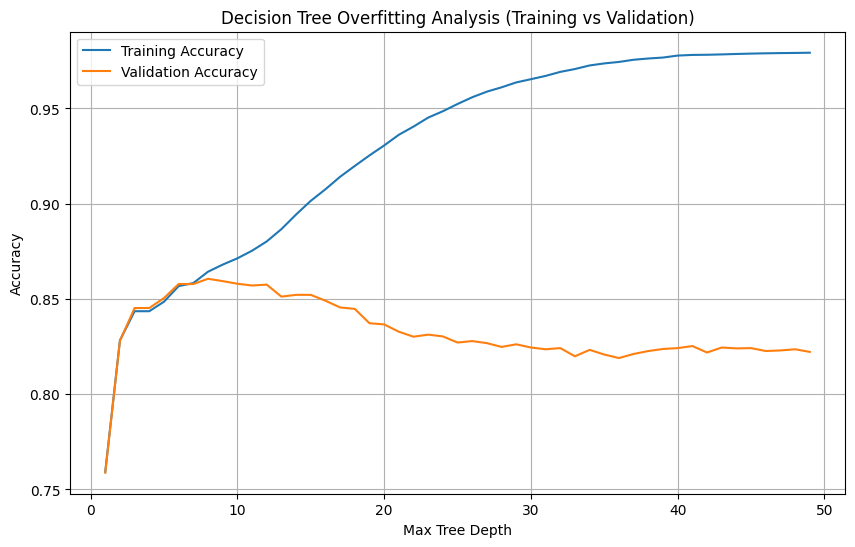

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split into features and target for both sets
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Create validation set from data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Decision Tree - varying max_depth
depths = range(1, 50)
train_acc = []
val_acc = []
test_acc = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    val_acc.append(accuracy_score(y_val, dt.predict(X_val)))

# Plot results (training vs validation)
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, val_acc, label='Validation Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis (Training vs Validation)')
plt.legend()
plt.grid()
plt.show()

## AdaBoost

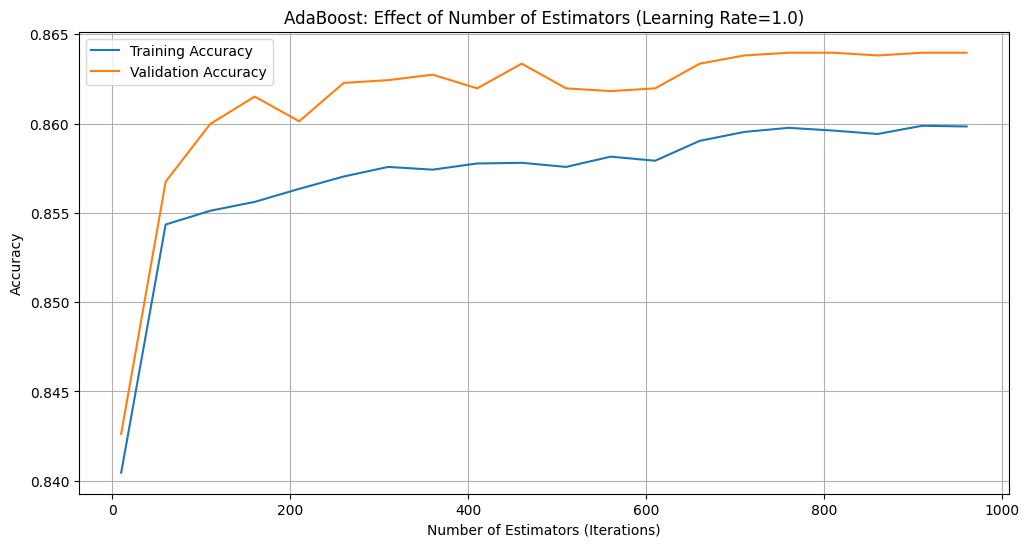

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

#Split into training and validation
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# AdaBoost - varying number of iterations
n_estimators_range = range(10, 1001, 50)
train_acc_ada = []
val_acc_ada = []

for n in n_estimators_range:
    ada = AdaBoostClassifier(
        n_estimators=n,
        learning_rate=1.0,
        random_state=42
    )
    ada.fit(X_train, y_train)
    train_acc_ada.append(accuracy_score(y_train, ada.predict(X_train)))
    val_acc_ada.append(accuracy_score(y_val, ada.predict(X_val)))

# Plot results for n_estimators
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_acc_ada, label='Training Accuracy')
plt.plot(n_estimators_range, val_acc_ada, label='Validation Accuracy')
plt.xlabel('Number of Estimators (Iterations)')
plt.ylabel('Accuracy')
plt.title('AdaBoost: Effect of Number of Estimators (Learning Rate=1.0)')
plt.legend()
plt.grid()
plt.show()

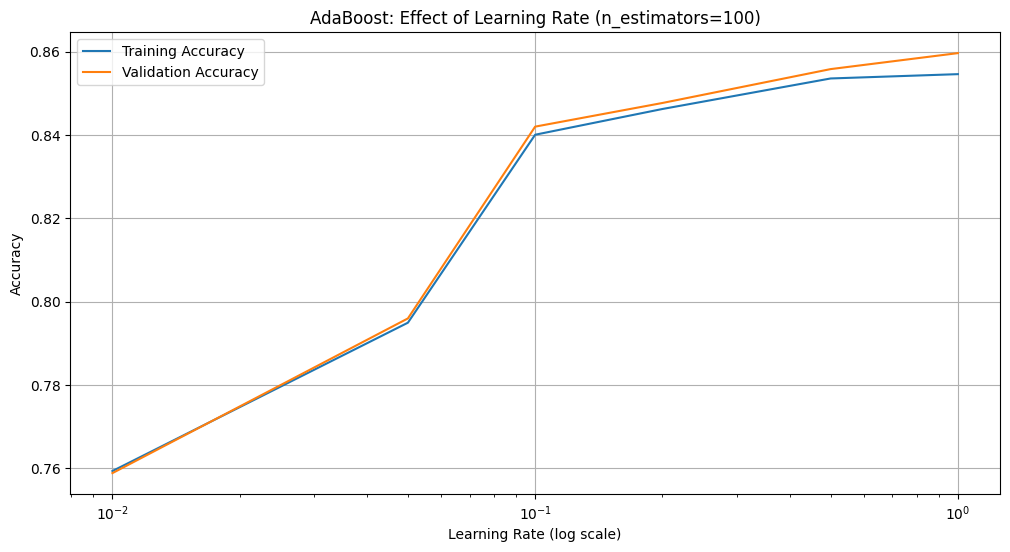

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost - varying learning rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
train_acc_lr = []
val_acc_lr = []

for lr in learning_rates:
    ada = AdaBoostClassifier(
        n_estimators=100,  # Fixed number of estimators
        learning_rate=lr,
        random_state=42
    )
    ada.fit(X_train, y_train)
    train_acc_lr.append(accuracy_score(y_train, ada.predict(X_train)))
    val_acc_lr.append(accuracy_score(y_val, ada.predict(X_val)))

# Plot results for learning rate
plt.figure(figsize=(12, 6))
plt.semilogx(learning_rates, train_acc_lr, label='Training Accuracy')
plt.semilogx(learning_rates, val_acc_lr, label='Validation Accuracy')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Accuracy')
plt.title('AdaBoost: Effect of Learning Rate (n_estimators=100)')
plt.legend()
plt.grid()
plt.show()

## Gradient Boosting

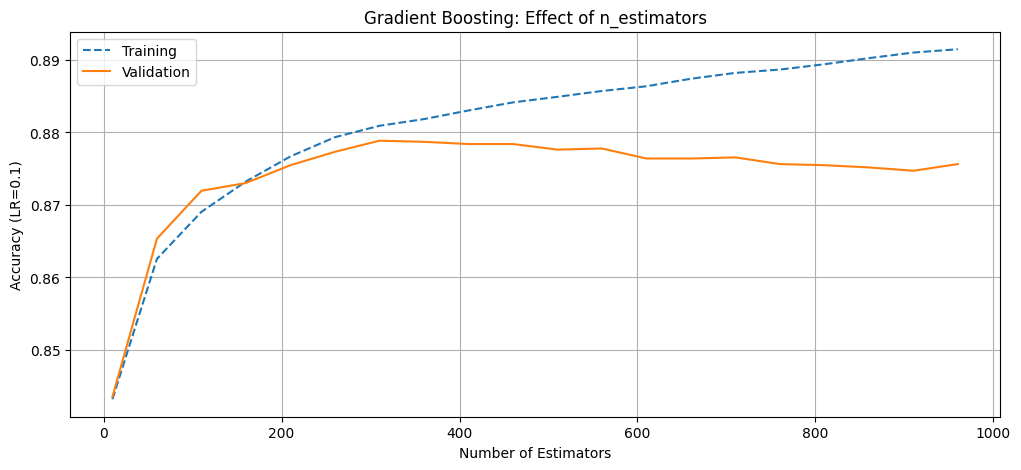

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Prepare data
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop('income', axis=1),
    train_df['income'],
    test_size=0.2,
    random_state=42
)

# Plot 1: Varying number of estimators (fixed learning rate)
plt.figure(figsize=(12, 5))
n_estimators_range = range(10, 1001, 50)
fixed_learning_rate = 0.1

train_acc_n = []
val_acc_n = []

for n in n_estimators_range:
    gb = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=fixed_learning_rate,
        random_state=42
    )
    gb.fit(X_train, y_train)
    train_acc_n.append(accuracy_score(y_train, gb.predict(X_train)))
    val_acc_n.append(accuracy_score(y_val, gb.predict(X_val)))

plt.plot(n_estimators_range, train_acc_n, '--', label='Training')
plt.plot(n_estimators_range, val_acc_n, '-', label='Validation')
plt.xlabel('Number of Estimators')
plt.ylabel(f'Accuracy (LR={fixed_learning_rate})')
plt.title('Gradient Boosting: Effect of n_estimators')
plt.legend()
plt.grid()

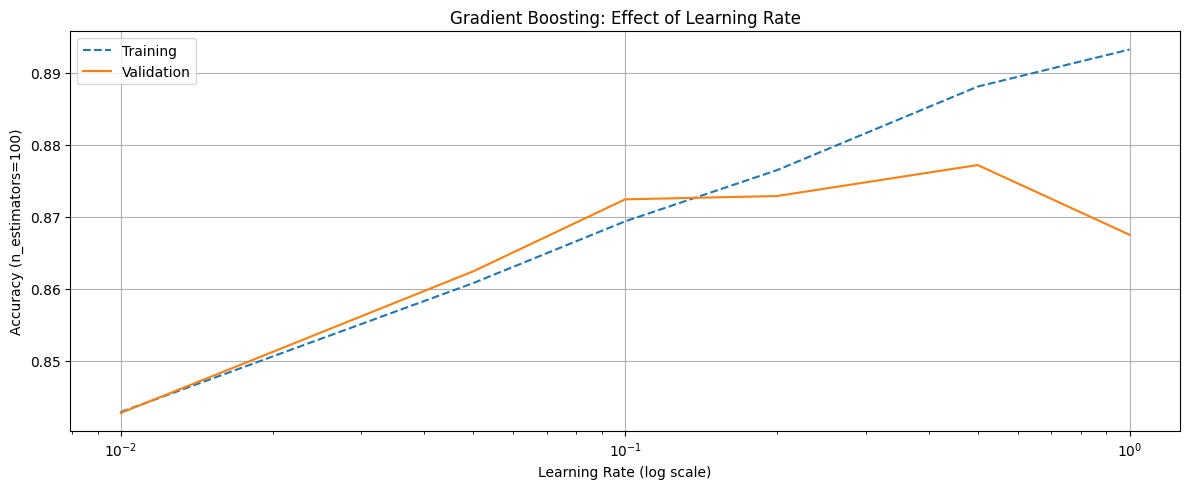

In [ ]:
# Plot 2: Varying learning rate (fixed n_estimators)
plt.figure(figsize=(12, 5))
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
fixed_n_estimators = 100

train_acc_lr = []
val_acc_lr = []

for lr in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators=fixed_n_estimators,
        learning_rate=lr,
        random_state=42
    )
    gb.fit(X_train, y_train)
    train_acc_lr.append(accuracy_score(y_train, gb.predict(X_train)))
    val_acc_lr.append(accuracy_score(y_val, gb.predict(X_val)))

plt.semilogx(learning_rates, train_acc_lr, '--', label='Training')
plt.semilogx(learning_rates, val_acc_lr, '-', label='Validation')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel(f'Accuracy (n_estimators={fixed_n_estimators})')
plt.title('Gradient Boosting: Effect of Learning Rate')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Random Forests

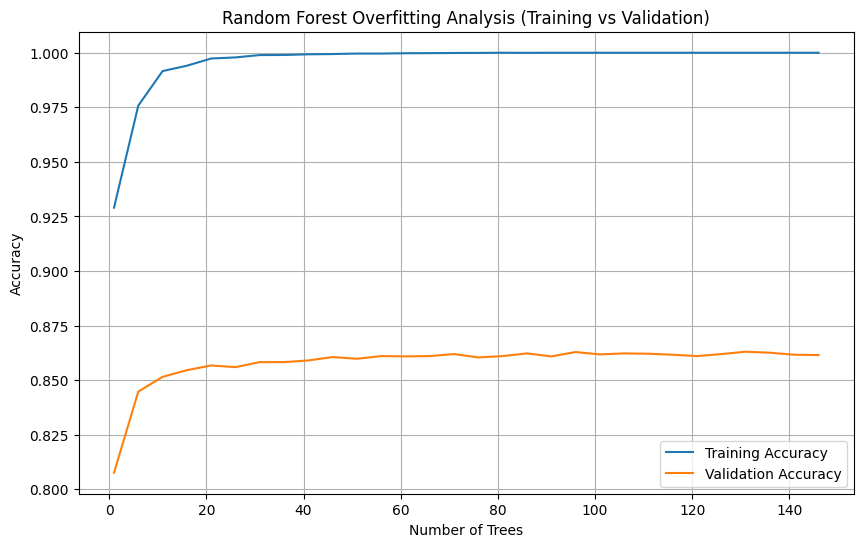

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Split into features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']

# Create validation set from training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Random Forest - varying number of trees
n_trees = range(1, 150, 5)
train_acc_rf = []
val_acc_rf = []

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n,
                              max_depth=None,
                              random_state=42)
    rf.fit(X_train, y_train)
    train_acc_rf.append(accuracy_score(y_train, rf.predict(X_train)))
    val_acc_rf.append(accuracy_score(y_val, rf.predict(X_val)))

# Plot results (training vs validation)
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_acc_rf, label='Training Accuracy')
plt.plot(n_trees, val_acc_rf, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Overfitting Analysis (Training vs Validation)')
plt.legend()
plt.grid()
plt.show()

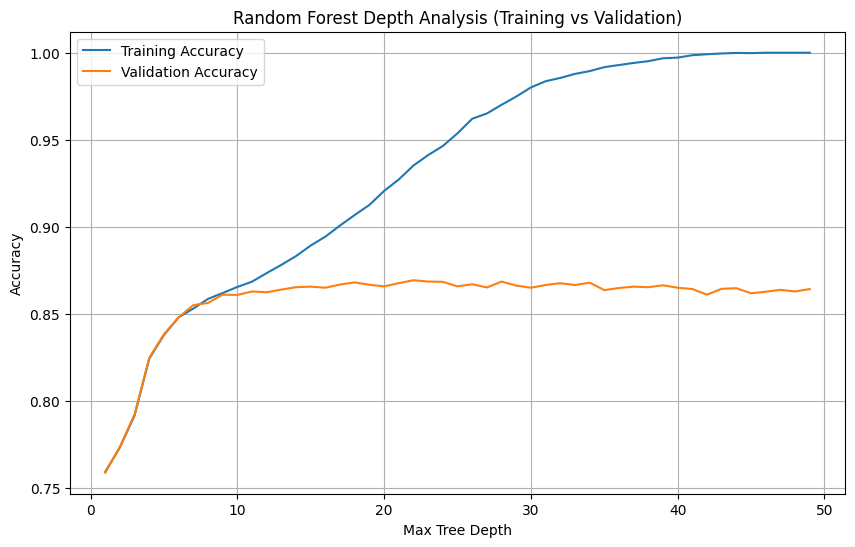

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Random Forest - varying max_depth
depths = range(1, 50)
train_acc_depth = []
val_acc_depth = []

for depth in depths:
    rf = RandomForestClassifier(n_estimators=100,
                              max_depth=depth,
                              random_state=42)
    rf.fit(X_train, y_train)
    train_acc_depth.append(accuracy_score(y_train, rf.predict(X_train)))
    val_acc_depth.append(accuracy_score(y_val, rf.predict(X_val)))

# Plot results (training vs validation)
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc_depth, label='Training Accuracy')
plt.plot(depths, val_acc_depth, label='Validation Accuracy')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Depth Analysis (Training vs Validation)')
plt.legend()
plt.grid()
plt.show()

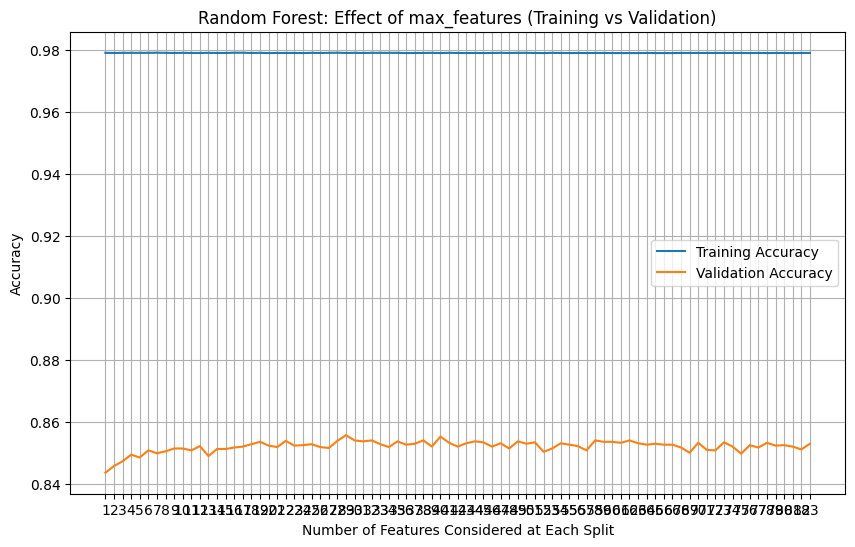

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Random Forest - varying number of features to consider at each split
max_features_options = range(1, X_train.shape[1]+1)
train_acc_features = []
val_acc_features = []

for max_feat in max_features_options:
    rf = RandomForestClassifier(n_estimators=100,
                              max_depth=None,
                              max_features=max_feat,
                              random_state=42)
    rf.fit(X_train, y_train)
    train_acc_features.append(accuracy_score(y_train, rf.predict(X_train)))
    val_acc_features.append(accuracy_score(y_val, rf.predict(X_val)))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_features_options, train_acc_features, label='Training Accuracy')
plt.plot(max_features_options, val_acc_features, label='Validation Accuracy')
plt.xlabel('Number of Features Considered at Each Split')
plt.ylabel('Accuracy')
plt.title('Random Forest: Effect of max_features (Training vs Validation)')
plt.xticks(range(1, X_train.shape[1]+1))
plt.legend()
plt.grid()
plt.show()

## **(ii) Accuracy & Runtime**

## Decision Trees

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Split into features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Create validation set (20% of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)

# Decision Tree hyperparameter grid
dt_params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with cross-validation
start_time = time.time()
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      dt_params,
                      cv=5,
                      n_jobs=-1,
                      verbose=1)
dt_grid.fit(X_train, y_train)
tuning_time = time.time() - start_time

# Get best model
best_dt = dt_grid.best_estimator_

# Evaluate on all sets
train_acc = accuracy_score(y_train, best_dt.predict(X_train))
val_acc = accuracy_score(y_val, best_dt.predict(X_val))
test_acc = accuracy_score(y_test, best_dt.predict(X_test))

# Print results
print("\n=== Decision Tree Tuning Results ===")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"\nTuning Time: {tuning_time:.2f} seconds")

Fitting 5 folds for each of 189 candidates, totalling 945 fits

=== Decision Tree Tuning Results ===
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Training Accuracy: 0.8684
Validation Accuracy: 0.8587
Test Accuracy: 0.8577

Tuning Time: 66.25 seconds


## AdaBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings("ignore")

# Split into features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Create validation set (20% of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)

# Iterate thru this grid to tune properly
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

start_time = time.time()
ada = AdaBoostClassifier(random_state=42)
grid = GridSearchCV(ada, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
tuning_time = time.time() - start_time

best_ada = grid.best_estimator_

# Evaluate on all sets
train_acc = accuracy_score(y_train, best_ada.predict(X_train))
val_acc = accuracy_score(y_val, best_ada.predict(X_val))
test_acc = accuracy_score(y_test, best_ada.predict(X_test))

print("=== AdaBoost Tuning Results ===")
print(f"Best Parameters: {grid.best_params_}")
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"\nTuning Time: {tuning_time:.2f} seconds")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
=== AdaBoost Tuning Results ===
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Training Accuracy: 0.8560
Validation Accuracy: 0.8612
Test Accuracy: 0.8577

Tuning Time: 111.57 seconds


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

# Split into features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Create validation set (20% of training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)

# Parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}


# Initialize model
start_time = time.time()
gb = GradientBoostingClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit to training data
random_search.fit(X_train, y_train)

#Tuning time
tuning_time = time.time() - start_time

# Best estimator
best_gb = random_search.best_estimator_

# Evaluate performance
train_acc = accuracy_score(y_train, best_gb.predict(X_train))
val_acc = accuracy_score(y_val, best_gb.predict(X_val))
test_acc = accuracy_score(y_test, best_gb.predict(X_test))

print("=== Optimal Gradient Boosting Results (Randomized Search) ===")
print(f"Best Parameters: {random_search.best_params_}")
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"\nTuning Time: {tuning_time:.2f} seconds")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
=== Optimal Gradient Boosting Results (Randomized Search) ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.1}

Training Accuracy: 0.8909
Validation Accuracy: 0.8781
Test Accuracy: 0.8724

Tuning Time: 770.12 seconds


## Random Forests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reduced hyperparameter space
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized Search
start_time = time.time()
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=50,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)
tuning_time = time.time() - start_time

# Get best model
best_rf = rf_random.best_estimator_

# Evaluate on all sets
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
val_acc = accuracy_score(y_val, best_rf.predict(X_val))
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

# Print results
print("\n=== Random Forest Tuning Results ===")
print(f"Best Parameters: {rf_random.best_params_}")
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"\nTuning Time: {tuning_time:.2f} seconds")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

=== Random Forest Tuning Results ===
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Training Accuracy: 0.9118
Validation Accuracy: 0.8675
Test Accuracy: 0.8648

Tuning Time: 421.60 seconds


## **(iii) Interpretation**

## Decision Trees

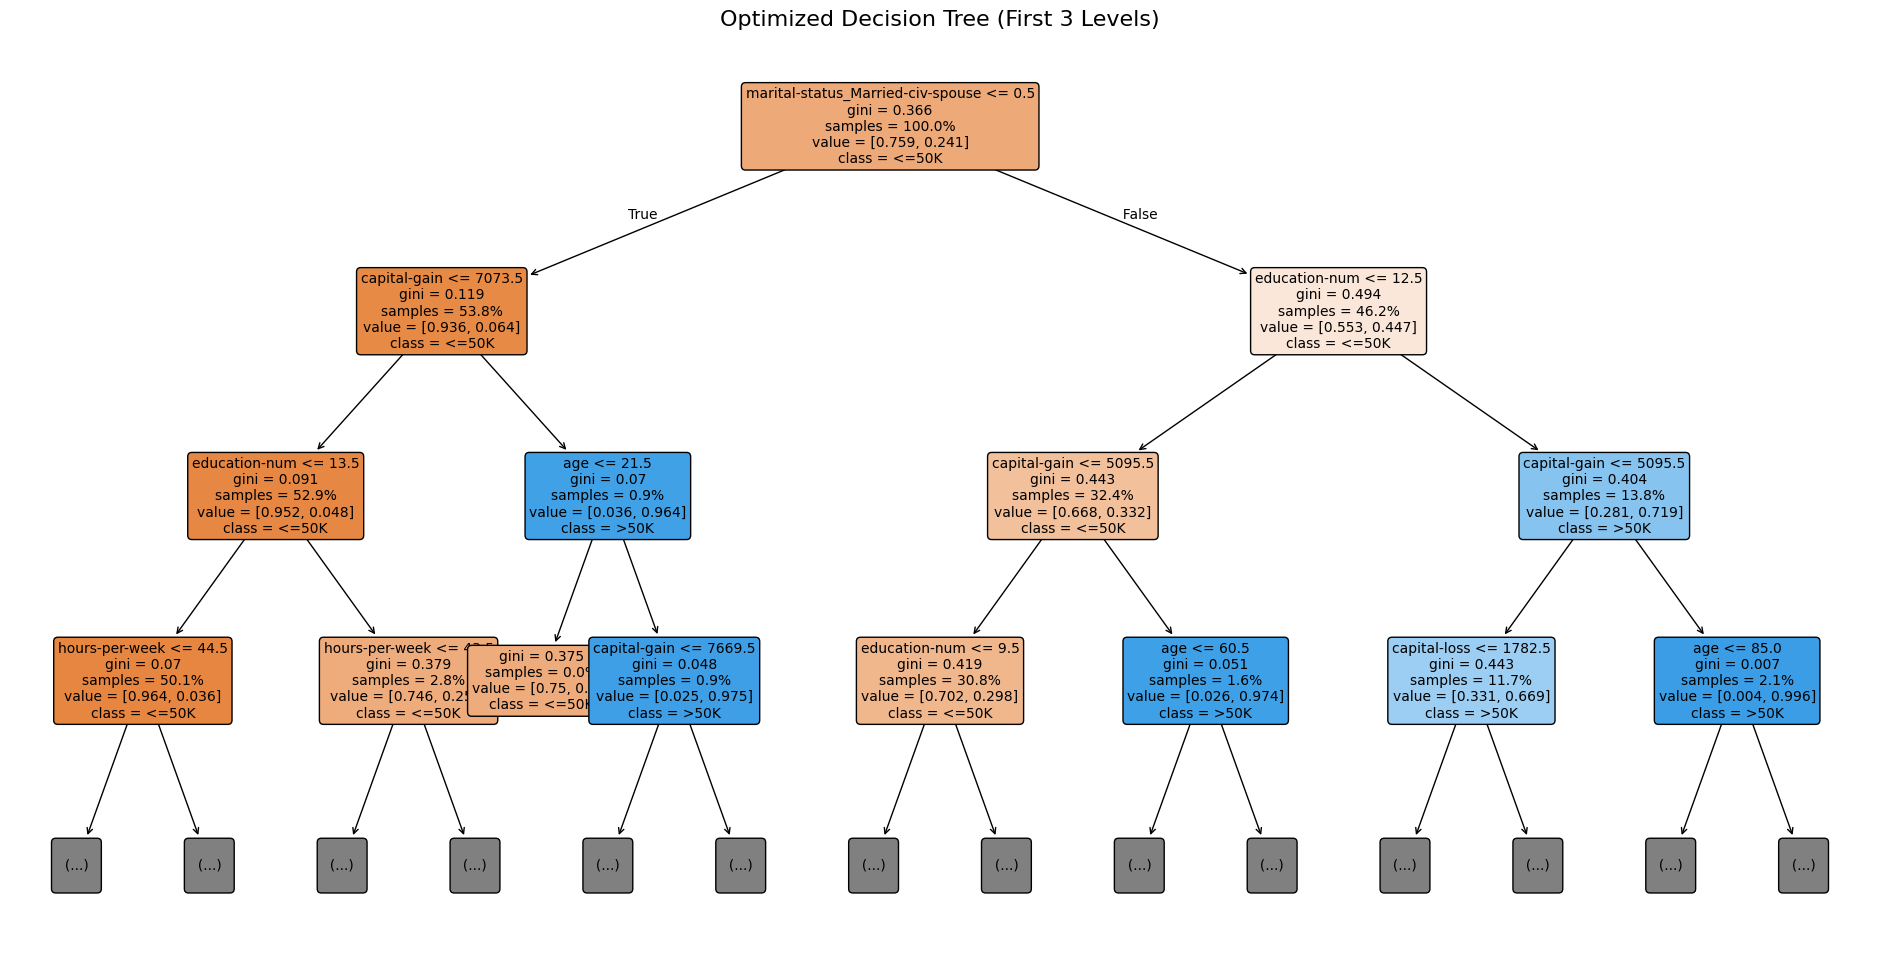

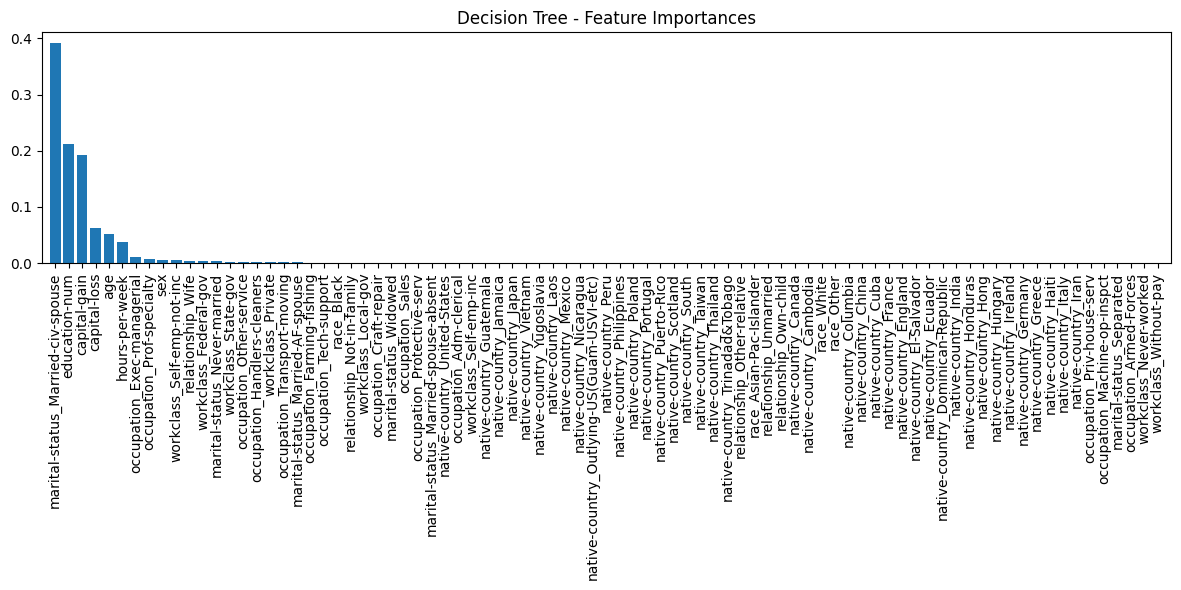

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Based on the best parameters from part ii
best_dt = DecisionTreeClassifier(
    max_depth=10,
    max_features=None,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_dt.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(24, 12))
plot_tree(best_dt,
          feature_names=X_train.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=3,
          fontsize=10)
plt.title("Optimized Decision Tree (First 3 Levels)", fontsize=16)
plt.show()

# Plot feature importances
importances = best_dt.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Decision Tree - Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## AdaBoost

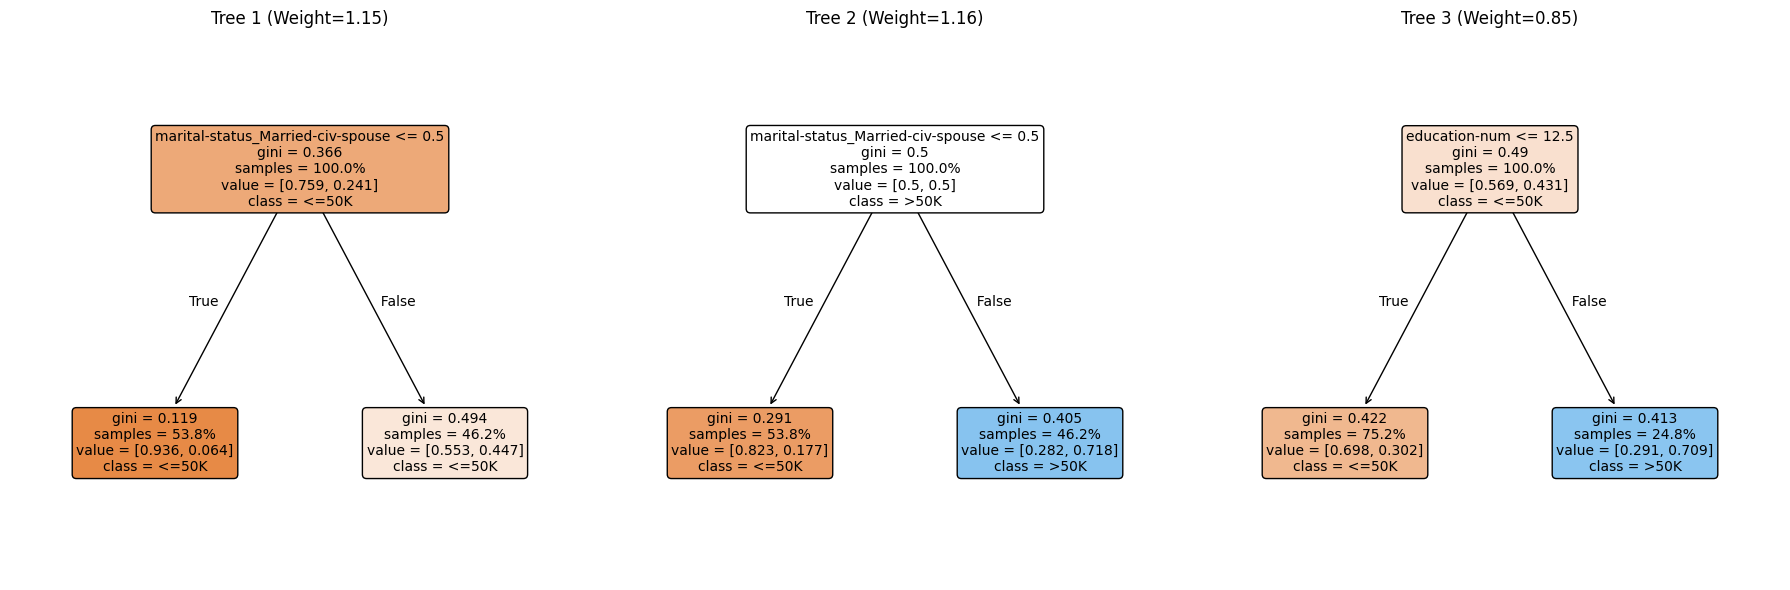

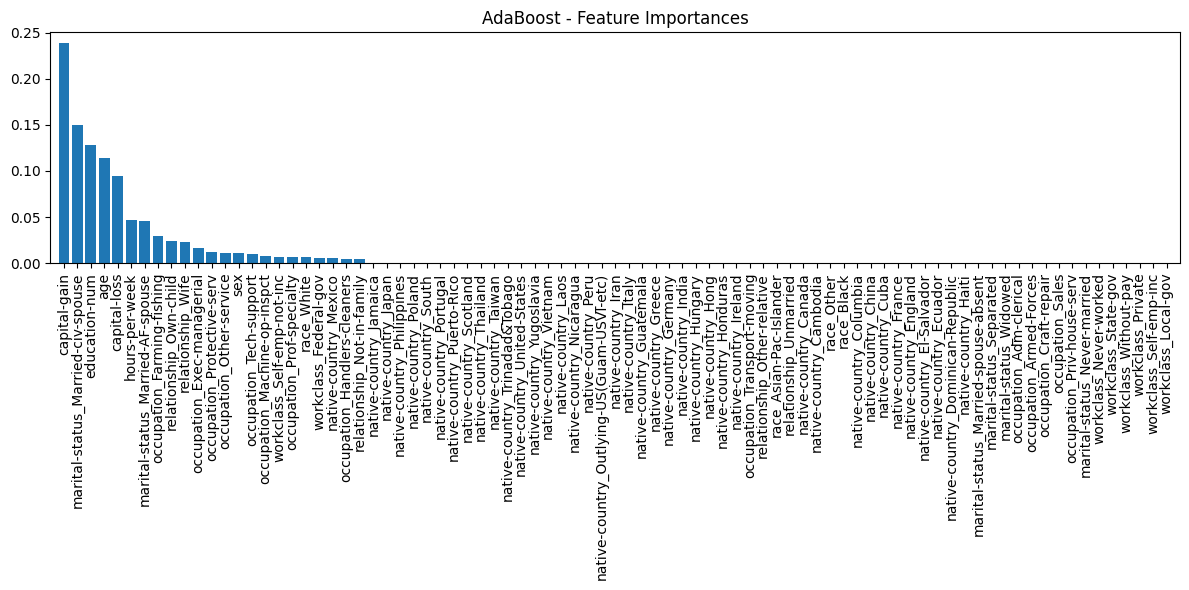

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
import numpy as np

# AdaBoost with optimal parameters
best_ada = AdaBoostClassifier(
    algorithm='SAMME',
    learning_rate=1.0,
    n_estimators=200,
    random_state=42
)
best_ada.fit(X_train, y_train)

# Visualize the first 3 decision stumps
plt.figure(figsize=(18, 6))
for i, tree in enumerate(best_ada.estimators_[:3]):
    plt.subplot(1, 3, i+1)
    plot_tree(tree,
              feature_names=X_train.columns,
              class_names=['<=50K', '>50K'],
              filled=True,
              rounded=True,
              max_depth=3,
              proportion=True,
              fontsize=10)
    plt.title(f"Tree {i+1} (Weight={best_ada.estimator_weights_[i]:.2f})", fontsize=12)
plt.tight_layout()
plt.show()

# Plot feature importances
importances = best_ada.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("AdaBoost - Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Gradient Boosting

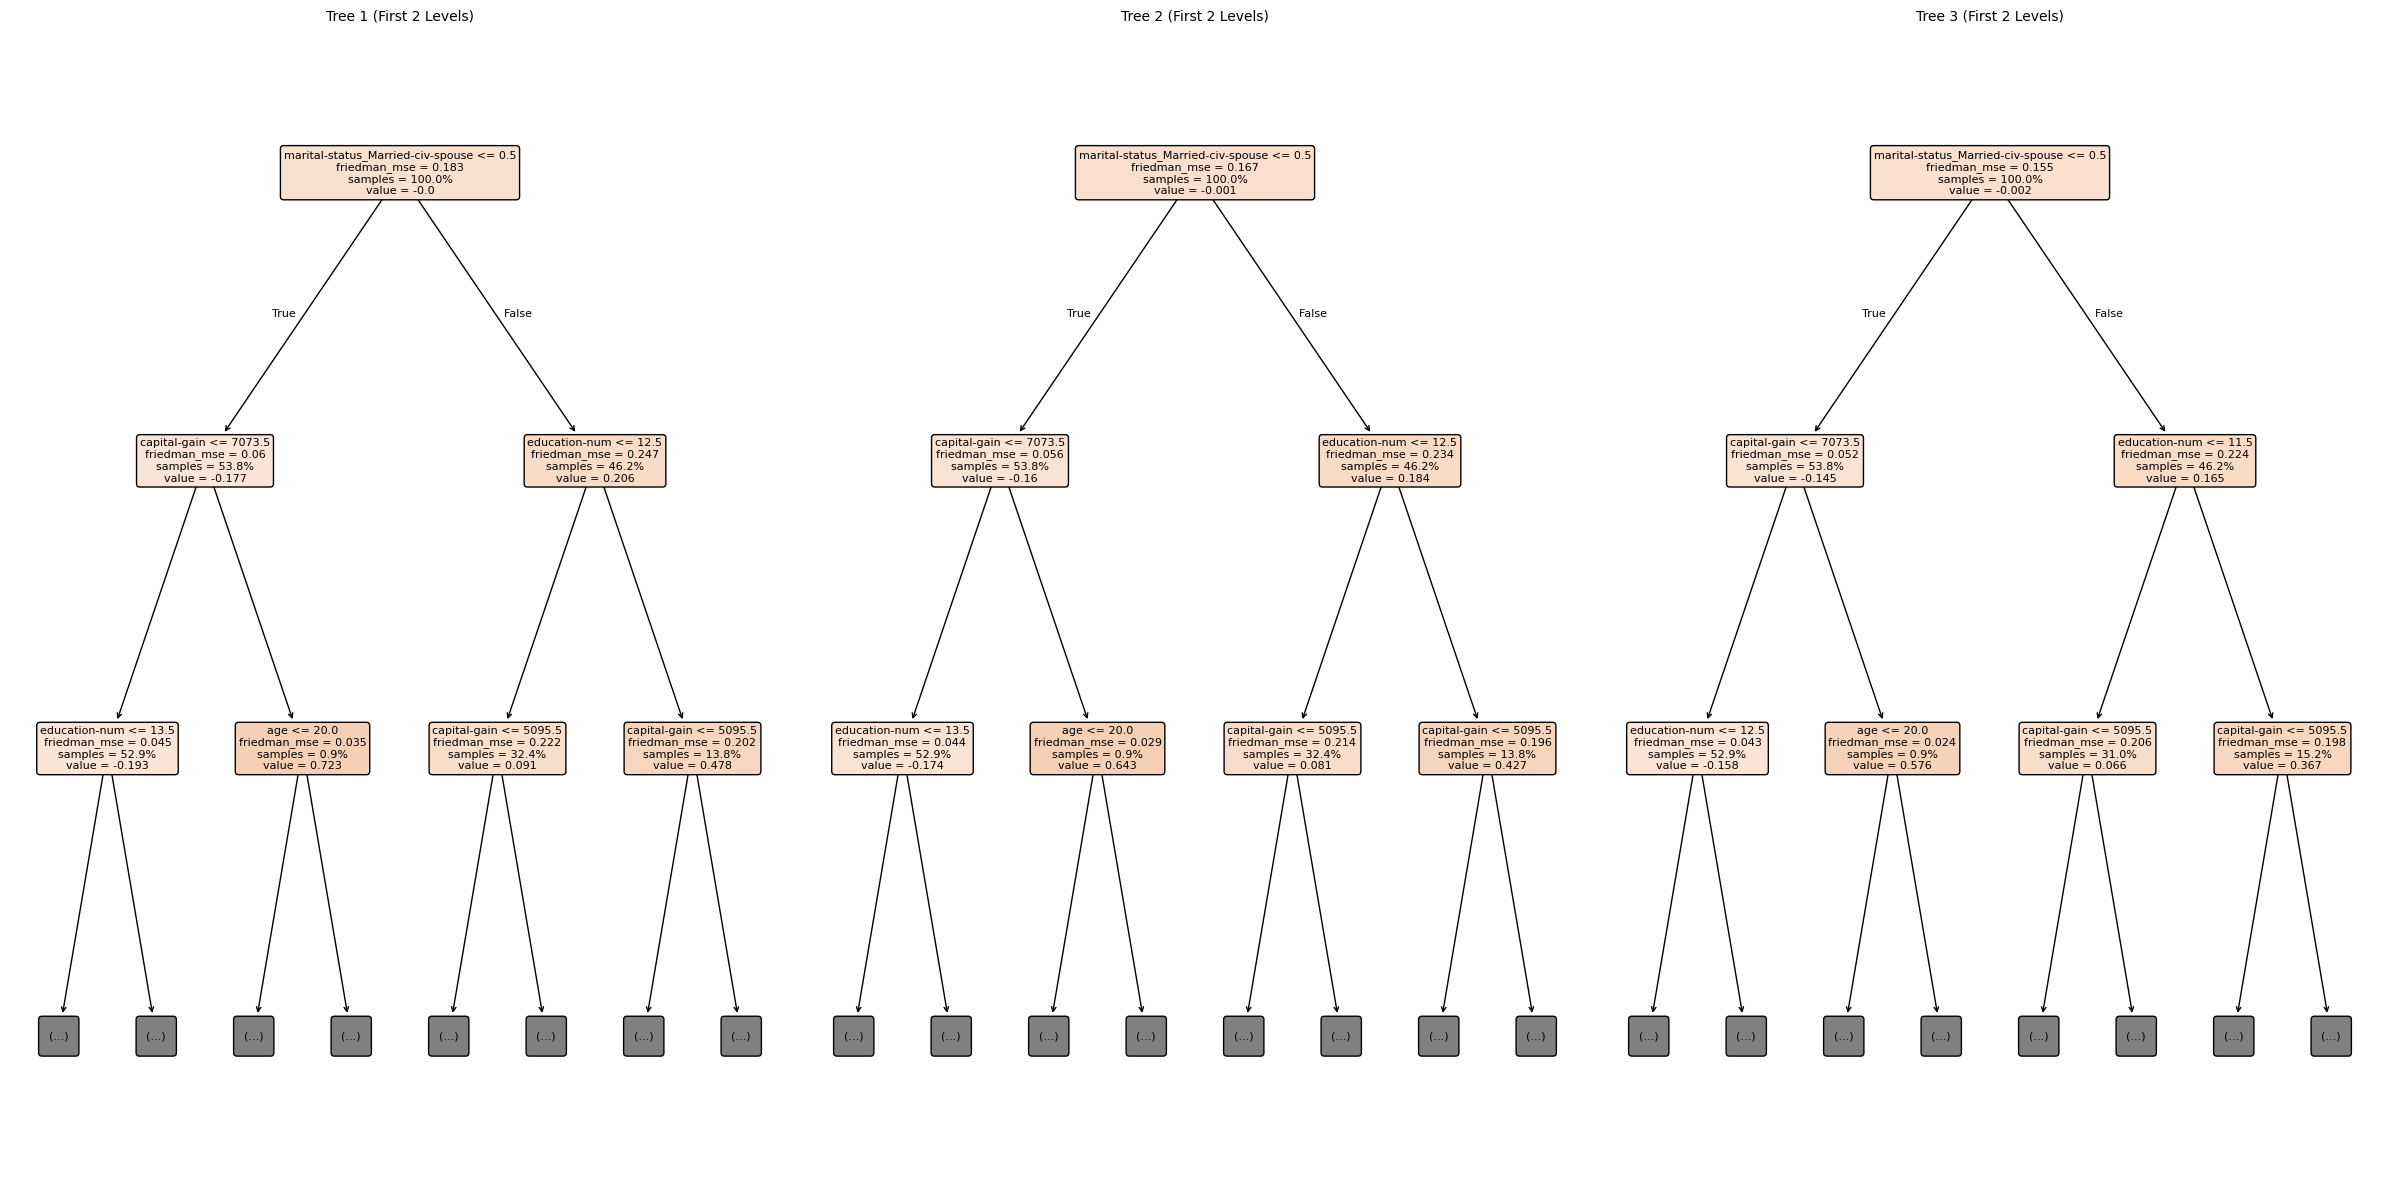

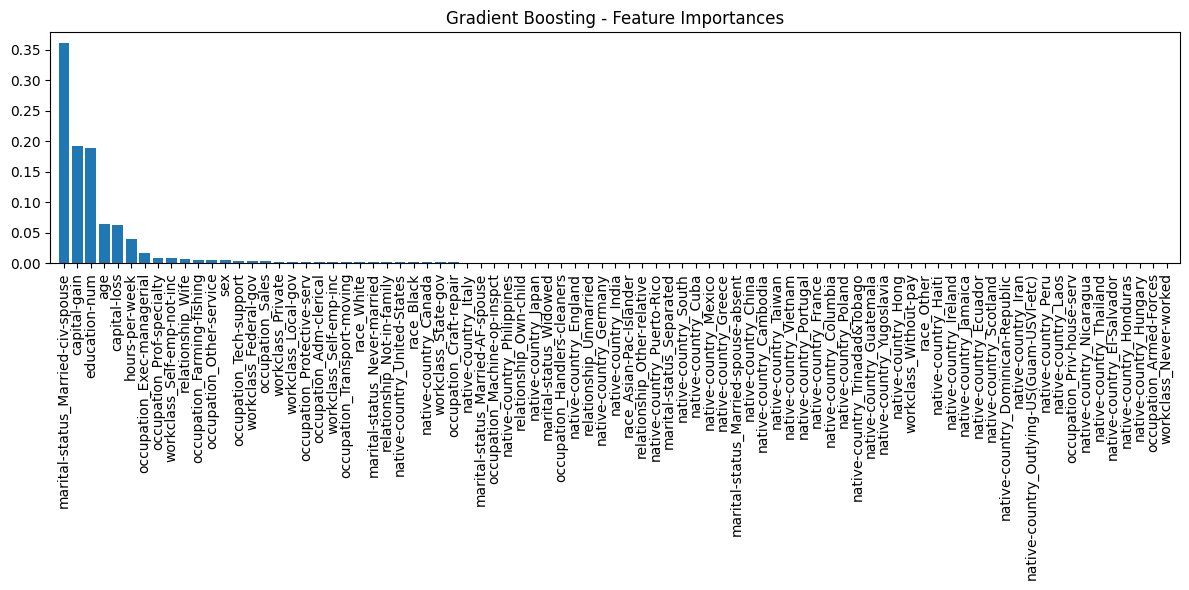

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import numpy as np

# Gradient Boosting with optimal parameters
best_gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)
best_gb.fit(X_train, y_train)

# Visualize a sample of individual trees (first 3 trees)
plt.figure(figsize=(24, 12))
for i, tree in enumerate(best_gb.estimators_[:3, 0]):
    plt.subplot(1, 3, i+1)
    plot_tree(tree,
              feature_names=X_train.columns,
              class_names=['<=50K', '>50K'],
              filled=True,
              rounded=True,
              max_depth=2,
              proportion=True,
              fontsize=8)
    plt.title(f"Tree {i+1} (First 2 Levels)", fontsize=10)
plt.tight_layout()
plt.show()

# Plot feature importances
importances = best_gb.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Gradient Boosting - Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Random Forests

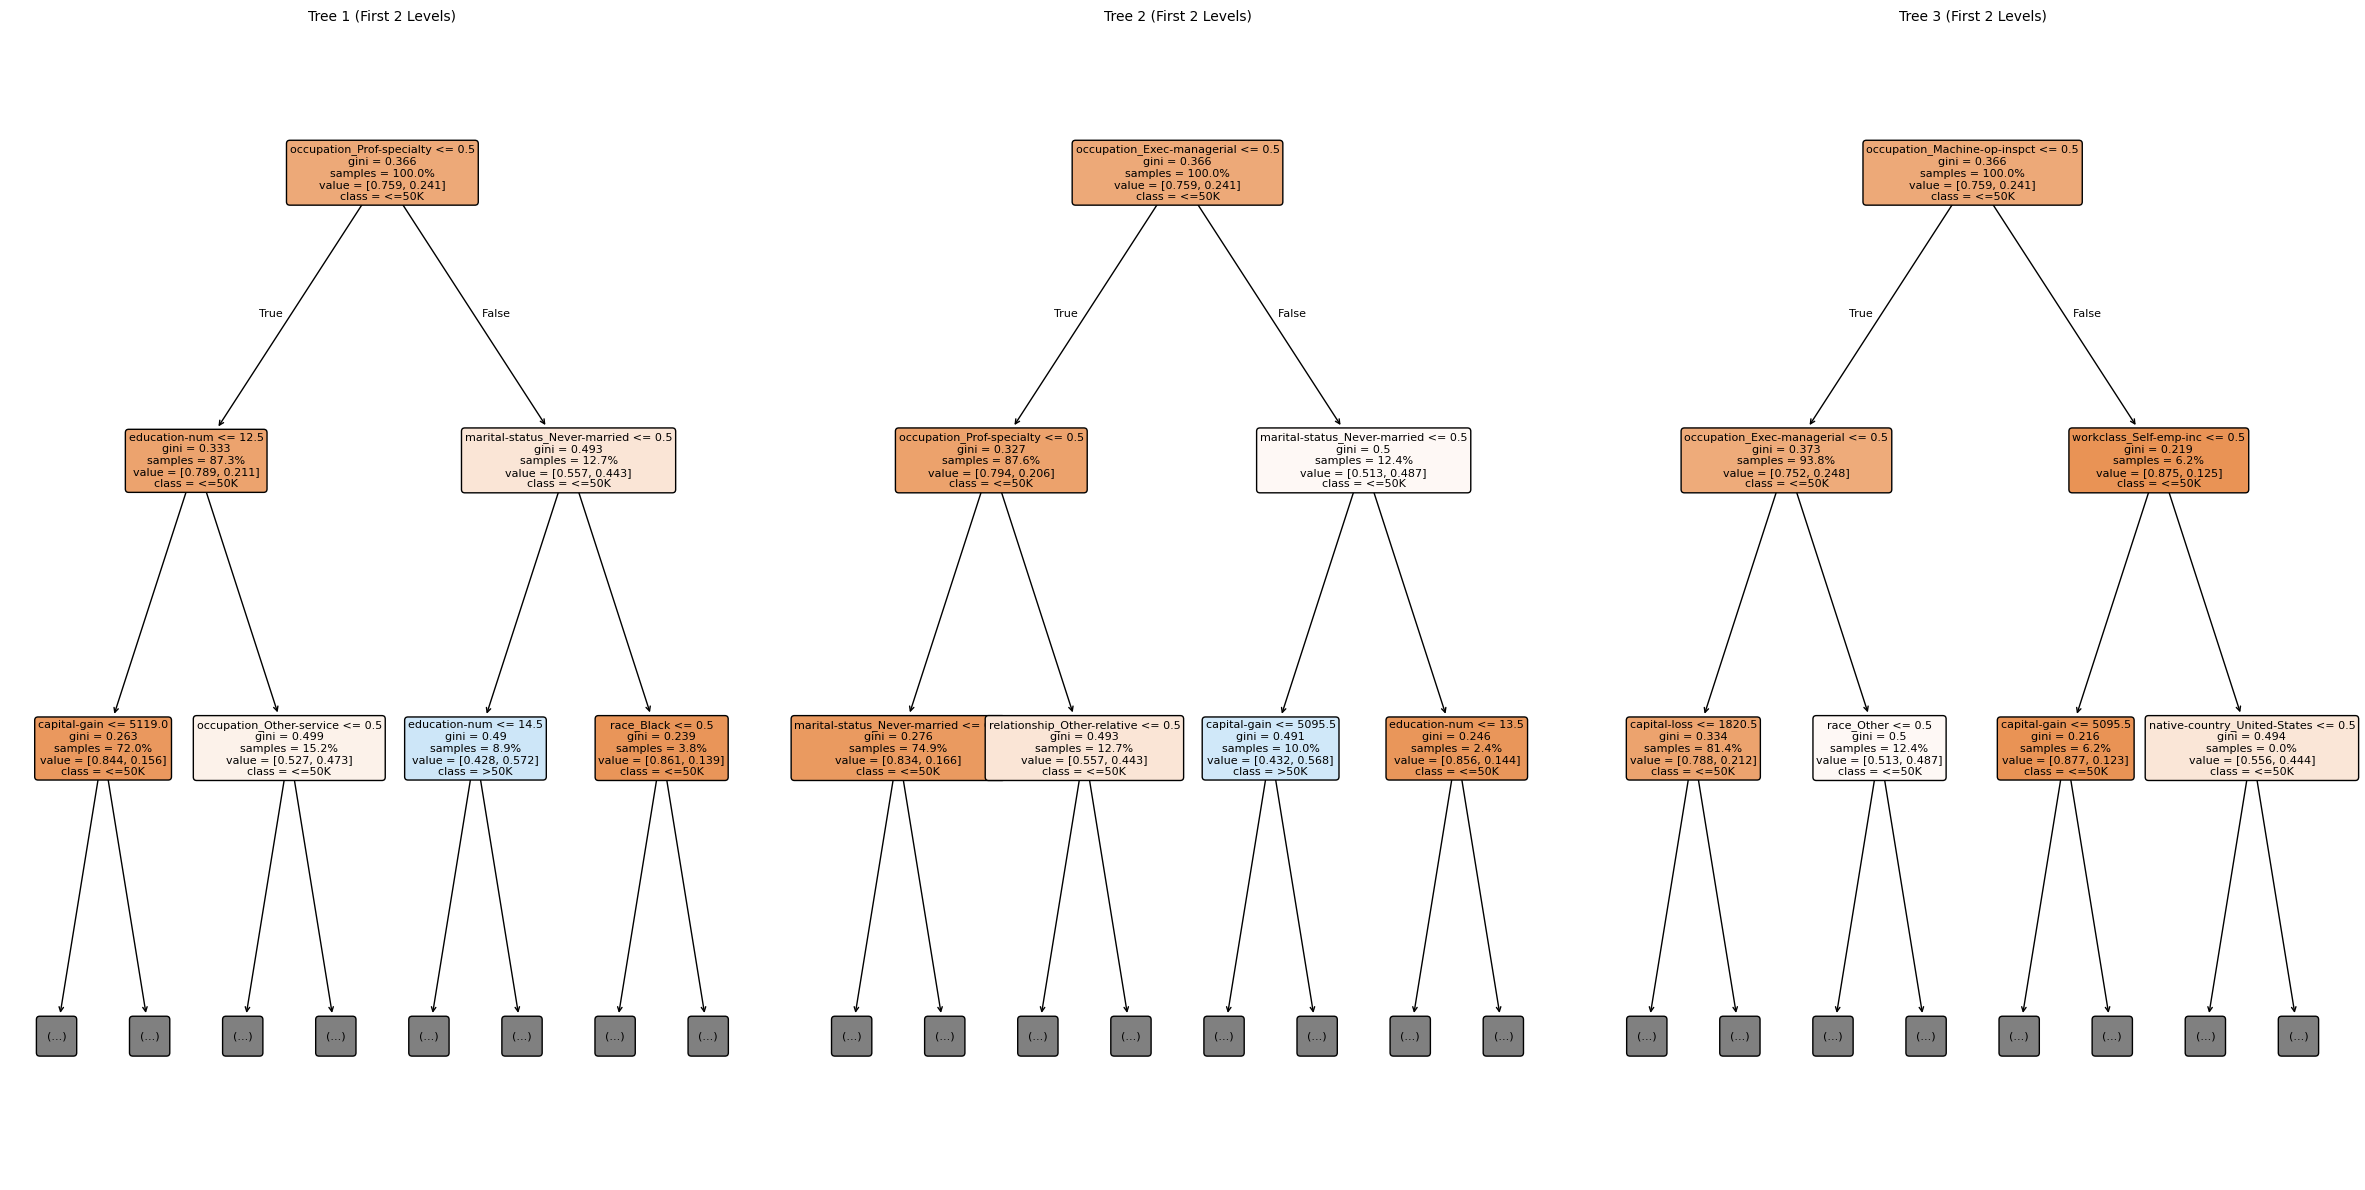

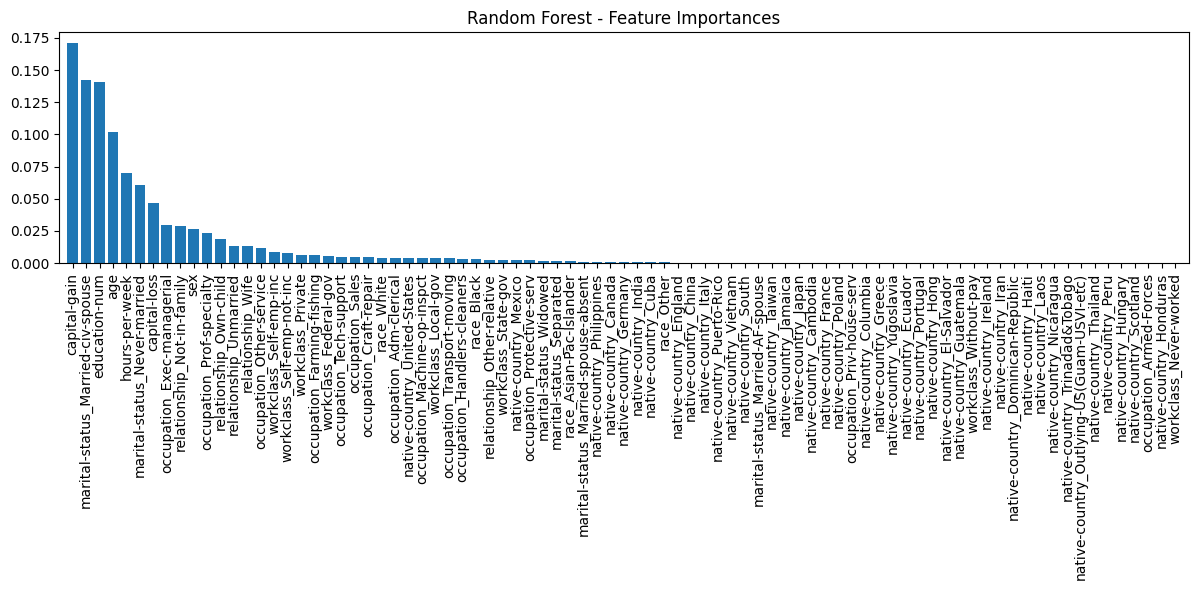

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Random Forest with optimal parameters form part ii
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# Visualize a sample of individual trees (first 3 trees)
plt.figure(figsize=(24, 12))
for i, tree_in_forest in enumerate(best_rf.estimators_[:3]):
    plt.subplot(1, 3, i+1)
    plot_tree(tree_in_forest,
              feature_names=X_train.columns,
              class_names=['<=50K', '>50K'],
              filled=True,
              rounded=True,
              max_depth=2,  # Show first 2 levels
              proportion=True,
              fontsize=8)
    plt.title(f"Tree {i+1} (First 2 Levels)", fontsize=10)
plt.tight_layout()
plt.show()

# Plot feature importances
importances = best_rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Random Forest - Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## **(b) Feedforward Neural Networks**

## **(i) Hyperparameters**

## Building the FFNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_train = train_df.drop('income', axis=1)
y_train = train_df['income']
X_test = test_df.drop('income', axis=1)
y_test = test_df['income']

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
train_data = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train.values))
val_data = TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val.values))
test_data = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test.values))

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

def train_model(hidden_layers, hidden_units, activation, optimizer_type, learning_rate,
                num_epochs=50):
    # Define model
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            layers = []
            input_size = X_train.shape[1]

            # Create hidden layers
            for i in range(hidden_layers):
                layers.append(nn.Linear(input_size if i == 0 else hidden_units, hidden_units))
                if activation == 'relu':
                    layers.append(nn.ReLU())
                elif activation == 'sigmoid':
                    layers.append(nn.Sigmoid())
                elif activation == 'leaky_relu':
                    layers.append(nn.LeakyReLU())
                layers.append(nn.Dropout(0.2))

            # Output layer
            layers.append(nn.Linear(hidden_units, 2))

            self.net = nn.Sequential(*layers)

        def forward(self, x):
            return self.net(x)

    model = Net()
    criterion = nn.CrossEntropyLoss()

    # Choose optimizer
    if optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(correct_train/total_train)

        # Validation
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_losses.append(val_loss/len(val_loader))
        val_accuracies.append(correct_val/total_val)

        if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, '
                  f'Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')

    # Plot training and validation curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(f'Layers: {hidden_layers}, Units: {hidden_units}, Act: {activation}, '
                 f'Opt: {optimizer_type}, LR: {learning_rate}')
    plt.show()

    return {
        'hidden_layers': hidden_layers,
        'hidden_units': hidden_units,
        'activation': activation,
        'optimizer': optimizer_type,
        'learning_rate': learning_rate,
        'train_loss': train_losses[-1],
        'val_loss': val_losses[-1],
        'train_acc': train_accuracies[-1],
        'val_acc': val_accuracies[-1]
    }

## Single Hidden Layer with ReLU Activation



Epoch 10/50, Train Loss: 0.3079, Val Loss: 0.3080, Train Acc: 0.8547, Val Acc: 0.8610
Epoch 20/50, Train Loss: 0.3015, Val Loss: 0.3079, Train Acc: 0.8600, Val Acc: 0.8604
Epoch 30/50, Train Loss: 0.3004, Val Loss: 0.3121, Train Acc: 0.8605, Val Acc: 0.8626
Epoch 40/50, Train Loss: 0.2969, Val Loss: 0.3186, Train Acc: 0.8616, Val Acc: 0.8617
Epoch 50/50, Train Loss: 0.2964, Val Loss: 0.3230, Train Acc: 0.8616, Val Acc: 0.8612


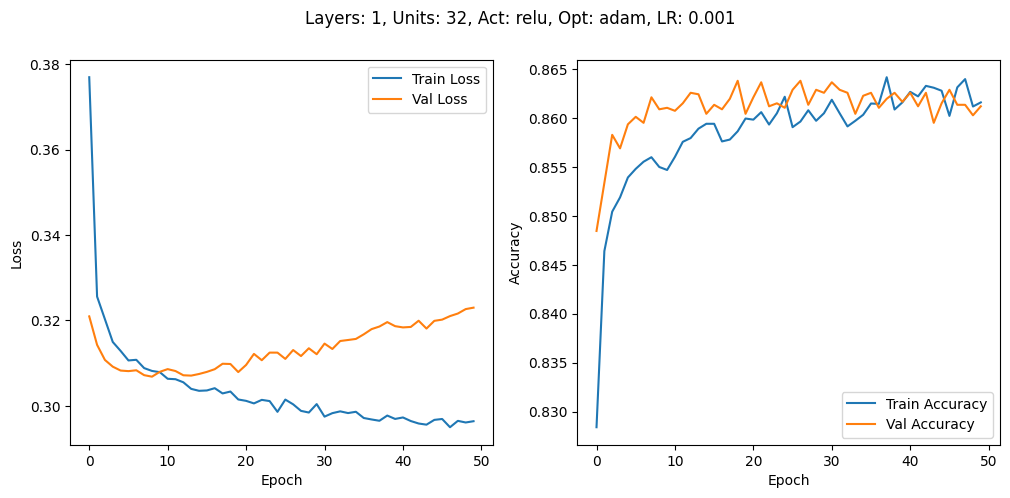

Epoch 10/50, Train Loss: 0.3039, Val Loss: 0.3086, Train Acc: 0.8575, Val Acc: 0.8600
Epoch 20/50, Train Loss: 0.2979, Val Loss: 0.3107, Train Acc: 0.8607, Val Acc: 0.8626
Epoch 30/50, Train Loss: 0.2925, Val Loss: 0.3225, Train Acc: 0.8642, Val Acc: 0.8607
Epoch 40/50, Train Loss: 0.2907, Val Loss: 0.3289, Train Acc: 0.8636, Val Acc: 0.8617
Epoch 50/50, Train Loss: 0.2882, Val Loss: 0.3402, Train Acc: 0.8647, Val Acc: 0.8626


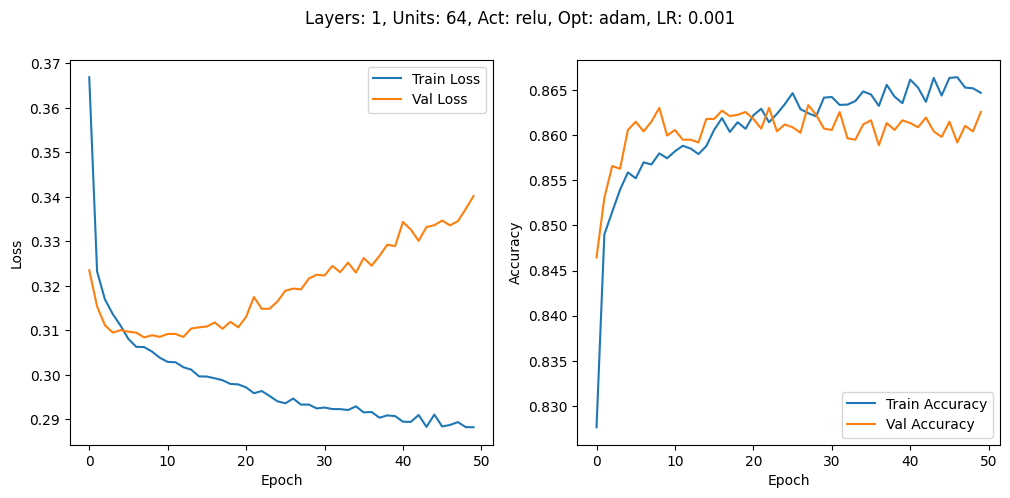

Epoch 10/50, Train Loss: 0.3004, Val Loss: 0.3131, Train Acc: 0.8604, Val Acc: 0.8587
Epoch 20/50, Train Loss: 0.2950, Val Loss: 0.3177, Train Acc: 0.8635, Val Acc: 0.8609
Epoch 30/50, Train Loss: 0.2892, Val Loss: 0.3282, Train Acc: 0.8645, Val Acc: 0.8580
Epoch 40/50, Train Loss: 0.2845, Val Loss: 0.3372, Train Acc: 0.8667, Val Acc: 0.8620
Epoch 50/50, Train Loss: 0.2821, Val Loss: 0.3483, Train Acc: 0.8697, Val Acc: 0.8575


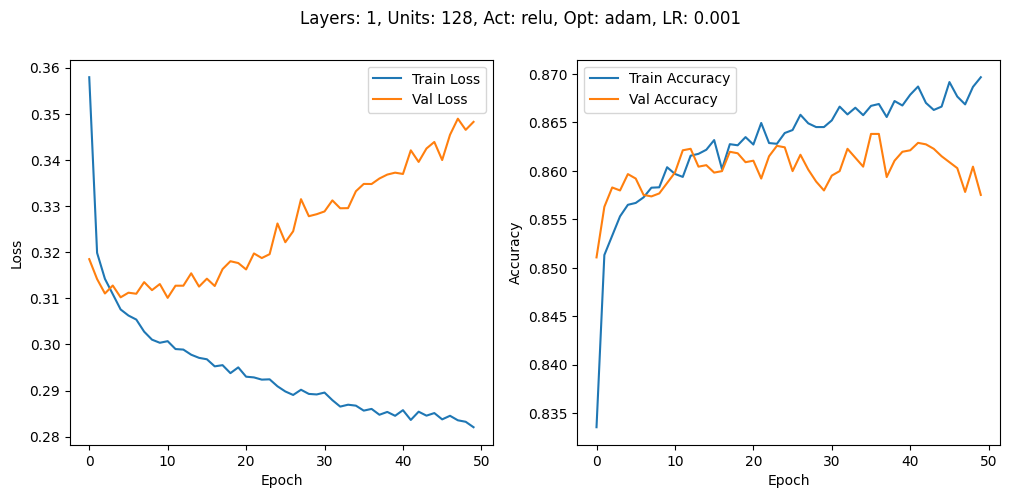

In [ ]:
results = []

# Test different hidden units with single layer and ReLU
for units in [32, 64, 128]:
    res = train_model(hidden_layers=1, hidden_units=units, activation='relu',
                     optimizer_type='adam', learning_rate=0.001)
    results.append(res)

## Two hidden layers with Sigmoid Activation

Epoch 10/50, Train Loss: 0.3187, Val Loss: 0.3130, Train Acc: 0.8499, Val Acc: 0.8552
Epoch 20/50, Train Loss: 0.3116, Val Loss: 0.3089, Train Acc: 0.8535, Val Acc: 0.8581
Epoch 30/50, Train Loss: 0.3073, Val Loss: 0.3086, Train Acc: 0.8564, Val Acc: 0.8600
Epoch 40/50, Train Loss: 0.3029, Val Loss: 0.3080, Train Acc: 0.8583, Val Acc: 0.8609
Epoch 50/50, Train Loss: 0.3000, Val Loss: 0.3097, Train Acc: 0.8583, Val Acc: 0.8591


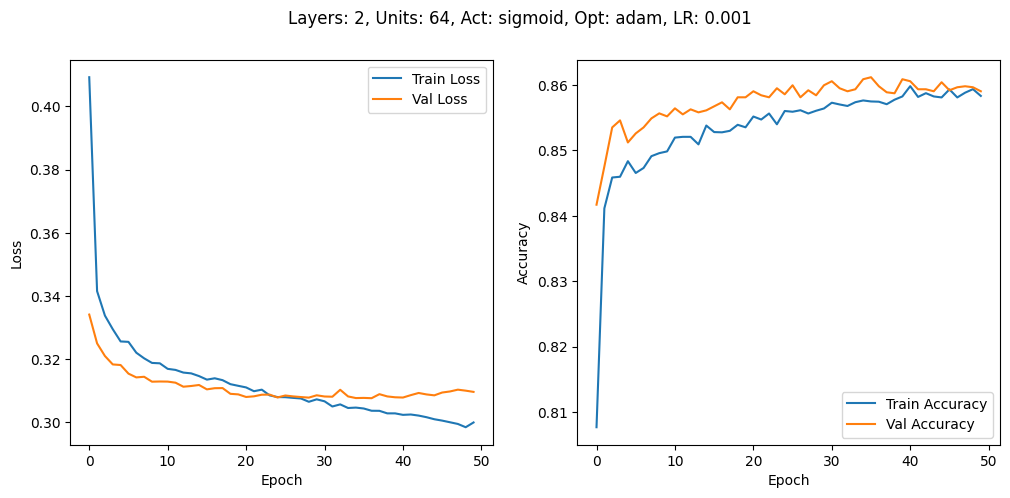

Epoch 10/50, Train Loss: 0.3167, Val Loss: 0.3132, Train Acc: 0.8517, Val Acc: 0.8549
Epoch 20/50, Train Loss: 0.3102, Val Loss: 0.3102, Train Acc: 0.8549, Val Acc: 0.8577
Epoch 30/50, Train Loss: 0.3037, Val Loss: 0.3106, Train Acc: 0.8568, Val Acc: 0.8601
Epoch 40/50, Train Loss: 0.2993, Val Loss: 0.3112, Train Acc: 0.8588, Val Acc: 0.8600
Epoch 50/50, Train Loss: 0.2934, Val Loss: 0.3122, Train Acc: 0.8619, Val Acc: 0.8601


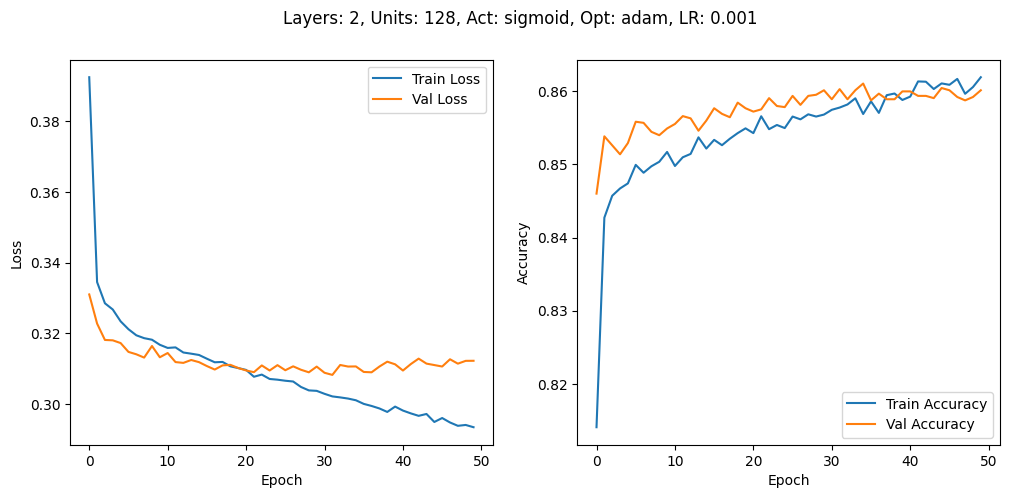

In [ ]:
# Test two hidden layers with sigmoid activation
for units in [64, 128]:
    res = train_model(hidden_layers=2, hidden_units=units, activation='sigmoid',
                     optimizer_type='adam', learning_rate=0.001)
    results.append(res)

## Difference Activation Functions

Epoch 10/50, Train Loss: 0.3005, Val Loss: 0.3070, Train Acc: 0.8582, Val Acc: 0.8595
Epoch 20/50, Train Loss: 0.2942, Val Loss: 0.3121, Train Acc: 0.8627, Val Acc: 0.8587
Epoch 30/50, Train Loss: 0.2898, Val Loss: 0.3202, Train Acc: 0.8651, Val Acc: 0.8595
Epoch 40/50, Train Loss: 0.2852, Val Loss: 0.3309, Train Acc: 0.8662, Val Acc: 0.8595
Epoch 50/50, Train Loss: 0.2824, Val Loss: 0.3307, Train Acc: 0.8679, Val Acc: 0.8598


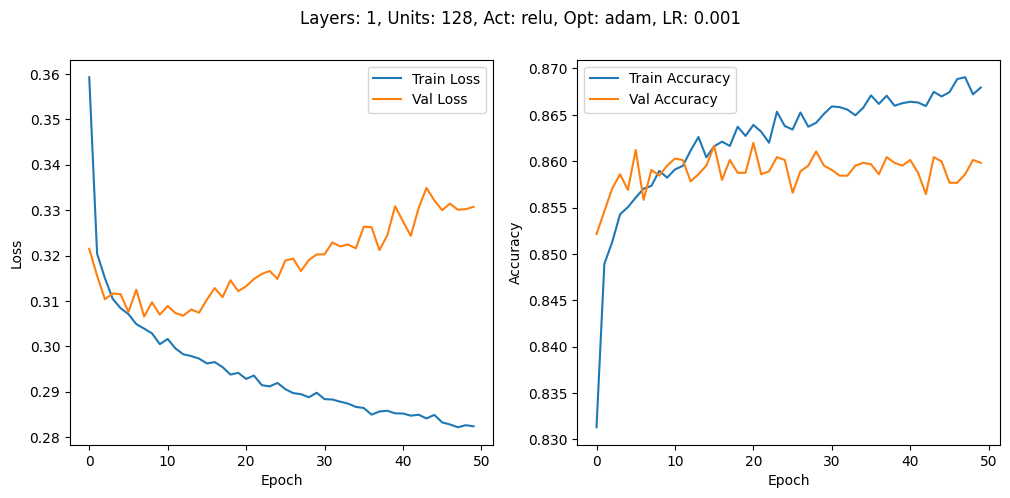

Epoch 10/50, Train Loss: 0.3197, Val Loss: 0.3149, Train Acc: 0.8517, Val Acc: 0.8541
Epoch 20/50, Train Loss: 0.3116, Val Loss: 0.3106, Train Acc: 0.8552, Val Acc: 0.8578
Epoch 30/50, Train Loss: 0.3072, Val Loss: 0.3088, Train Acc: 0.8552, Val Acc: 0.8609
Epoch 40/50, Train Loss: 0.3013, Val Loss: 0.3061, Train Acc: 0.8591, Val Acc: 0.8604
Epoch 50/50, Train Loss: 0.2979, Val Loss: 0.3064, Train Acc: 0.8613, Val Acc: 0.8601


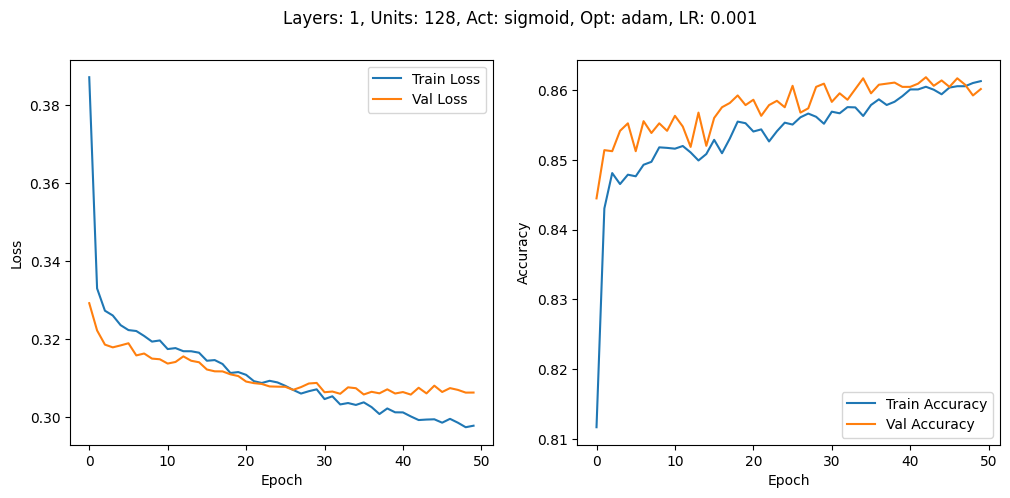

Epoch 10/50, Train Loss: 0.3002, Val Loss: 0.3108, Train Acc: 0.8614, Val Acc: 0.8580
Epoch 20/50, Train Loss: 0.2924, Val Loss: 0.3148, Train Acc: 0.8643, Val Acc: 0.8606
Epoch 30/50, Train Loss: 0.2878, Val Loss: 0.3194, Train Acc: 0.8644, Val Acc: 0.8597
Epoch 40/50, Train Loss: 0.2861, Val Loss: 0.3317, Train Acc: 0.8659, Val Acc: 0.8612
Epoch 50/50, Train Loss: 0.2810, Val Loss: 0.3403, Train Acc: 0.8698, Val Acc: 0.8607


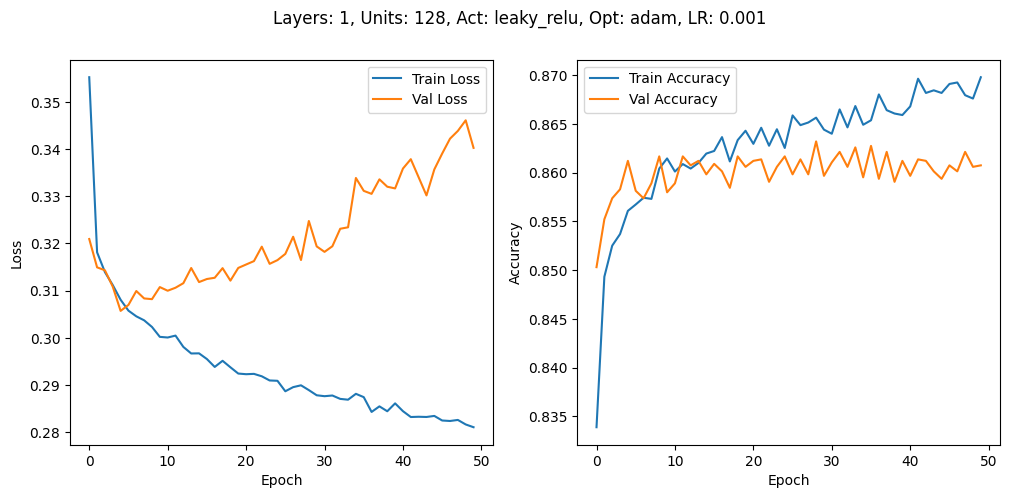

In [ ]:
# Compare activation functions
for activation in ['relu', 'sigmoid', 'leaky_relu']:
    res = train_model(hidden_layers=1, hidden_units=128, activation=activation,
                     optimizer_type='adam', learning_rate=0.001)
    results.append(res)

## Different Optimizers with Varying Learning Rates

Epoch 10/50, Train Loss: 0.3017, Val Loss: 0.3119, Train Acc: 0.8573, Val Acc: 0.8604
Epoch 20/50, Train Loss: 0.2924, Val Loss: 0.3165, Train Acc: 0.8636, Val Acc: 0.8634
Epoch 30/50, Train Loss: 0.2877, Val Loss: 0.3189, Train Acc: 0.8649, Val Acc: 0.8601
Epoch 40/50, Train Loss: 0.2836, Val Loss: 0.3309, Train Acc: 0.8674, Val Acc: 0.8567
Epoch 50/50, Train Loss: 0.2824, Val Loss: 0.3413, Train Acc: 0.8690, Val Acc: 0.8589


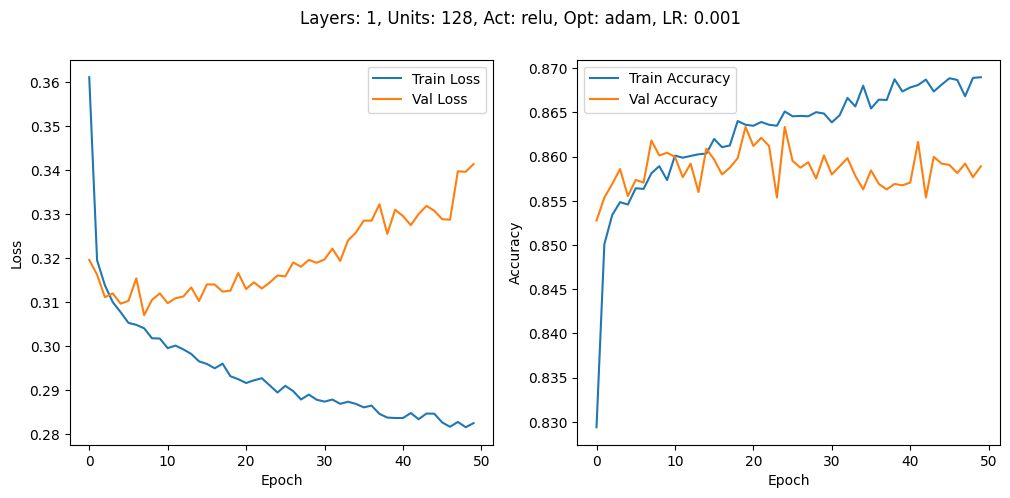

Epoch 10/50, Train Loss: 0.3250, Val Loss: 0.3213, Train Acc: 0.8470, Val Acc: 0.8515
Epoch 20/50, Train Loss: 0.3153, Val Loss: 0.3143, Train Acc: 0.8527, Val Acc: 0.8586
Epoch 30/50, Train Loss: 0.3096, Val Loss: 0.3127, Train Acc: 0.8544, Val Acc: 0.8598
Epoch 40/50, Train Loss: 0.3058, Val Loss: 0.3118, Train Acc: 0.8556, Val Acc: 0.8617
Epoch 50/50, Train Loss: 0.3042, Val Loss: 0.3103, Train Acc: 0.8579, Val Acc: 0.8620


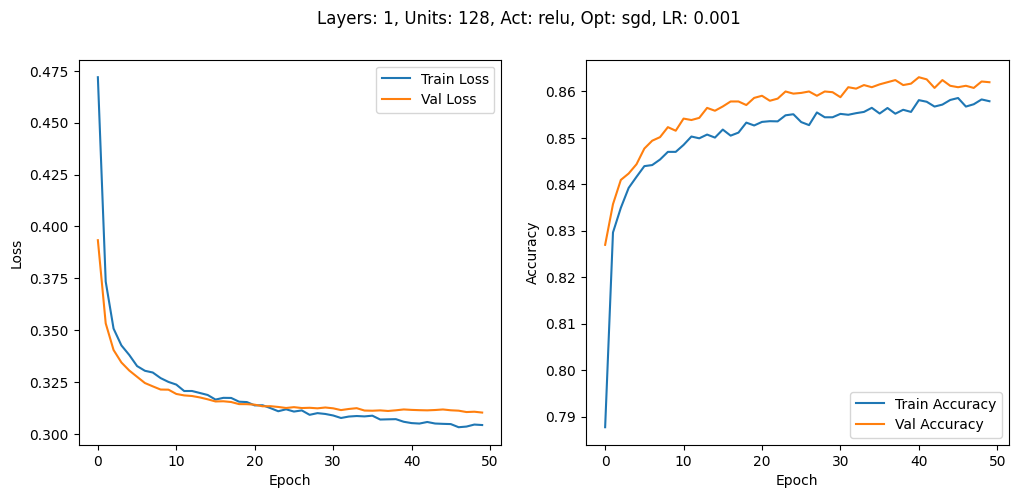

Epoch 10/50, Train Loss: 0.3234, Val Loss: 0.4118, Train Acc: 0.8537, Val Acc: 0.8552
Epoch 20/50, Train Loss: 0.3441, Val Loss: 0.8176, Train Acc: 0.8515, Val Acc: 0.8524
Epoch 30/50, Train Loss: 0.3242, Val Loss: 0.7004, Train Acc: 0.8522, Val Acc: 0.8511
Epoch 40/50, Train Loss: 0.3153, Val Loss: 0.8047, Train Acc: 0.8574, Val Acc: 0.8555
Epoch 50/50, Train Loss: 0.2969, Val Loss: 1.2922, Train Acc: 0.8604, Val Acc: 0.8540


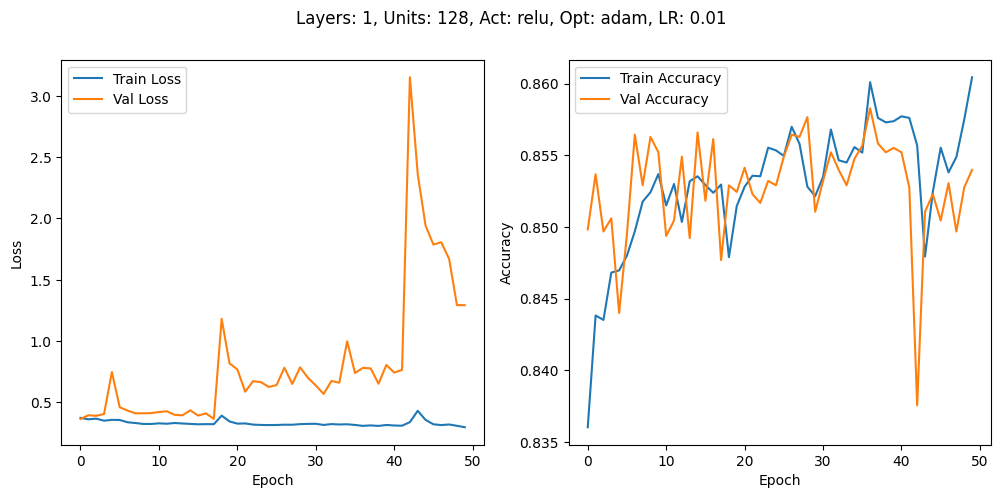

Epoch 10/50, Train Loss: 0.3011, Val Loss: 0.3104, Train Acc: 0.8591, Val Acc: 0.8587
Epoch 20/50, Train Loss: 0.2932, Val Loss: 0.3138, Train Acc: 0.8618, Val Acc: 0.8615
Epoch 30/50, Train Loss: 0.2878, Val Loss: 0.3248, Train Acc: 0.8652, Val Acc: 0.8591
Epoch 40/50, Train Loss: 0.2845, Val Loss: 0.3317, Train Acc: 0.8671, Val Acc: 0.8595
Epoch 50/50, Train Loss: 0.2828, Val Loss: 0.3422, Train Acc: 0.8693, Val Acc: 0.8594


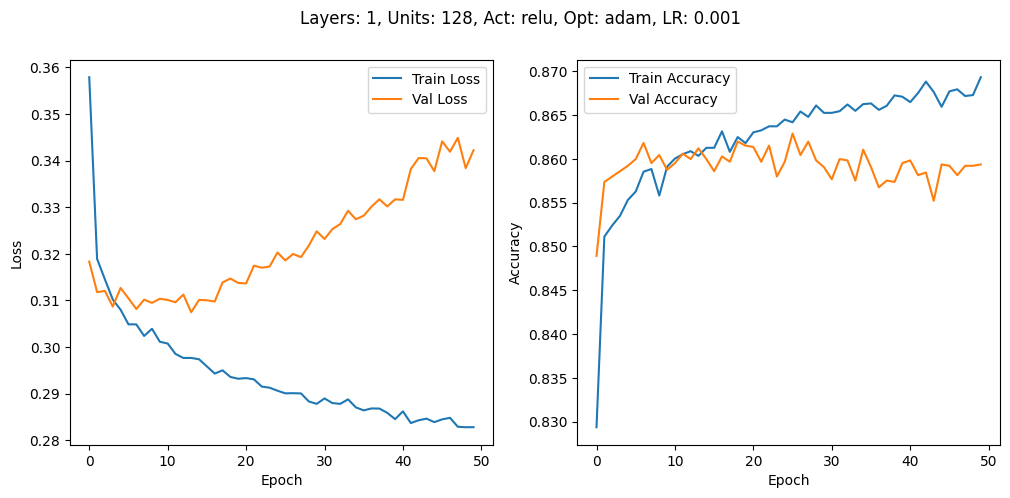

Epoch 10/50, Train Loss: 0.3164, Val Loss: 0.3128, Train Acc: 0.8524, Val Acc: 0.8549
Epoch 20/50, Train Loss: 0.3068, Val Loss: 0.3097, Train Acc: 0.8547, Val Acc: 0.8586
Epoch 30/50, Train Loss: 0.3029, Val Loss: 0.3092, Train Acc: 0.8585, Val Acc: 0.8603
Epoch 40/50, Train Loss: 0.3008, Val Loss: 0.3098, Train Acc: 0.8593, Val Acc: 0.8606
Epoch 50/50, Train Loss: 0.2983, Val Loss: 0.3105, Train Acc: 0.8607, Val Acc: 0.8600


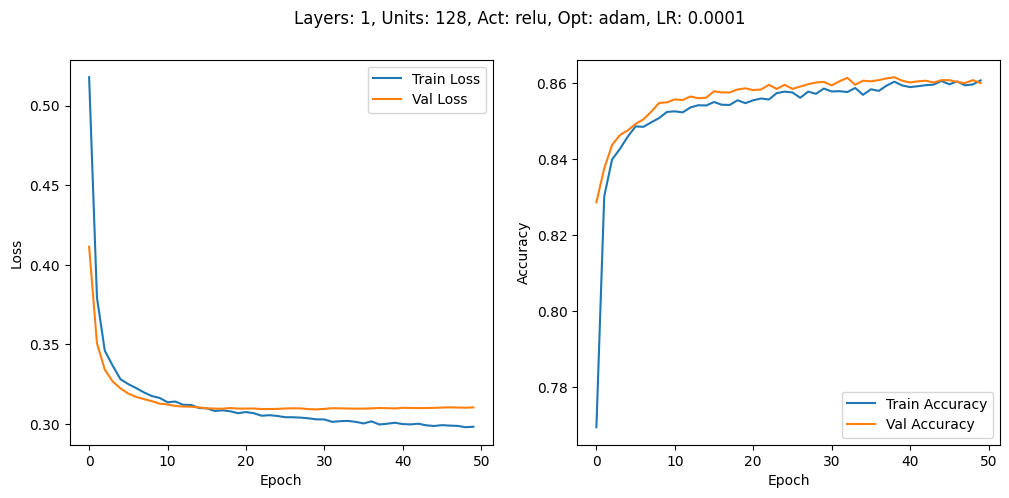

In [ ]:
# Compare optimizers
for opt in ['adam', 'sgd']:
    res = train_model(hidden_layers=1, hidden_units=128, activation='relu',
                     optimizer_type=opt, learning_rate=0.001)
    results.append(res)

# Test different learning rates
for lr in [0.01, 0.001, 0.0001]:
    res = train_model(hidden_layers=1, hidden_units=128, activation='relu',
                     optimizer_type='adam', learning_rate=lr)
    results.append(res)

## Different Random Initializations

Epoch 10/50, Train Loss: 0.3023, Val Loss: 0.3094, Train Acc: 0.8592, Val Acc: 0.8618
Epoch 20/50, Train Loss: 0.2937, Val Loss: 0.3195, Train Acc: 0.8634, Val Acc: 0.8601
Epoch 30/50, Train Loss: 0.2889, Val Loss: 0.3220, Train Acc: 0.8655, Val Acc: 0.8607
Epoch 40/50, Train Loss: 0.2822, Val Loss: 0.3330, Train Acc: 0.8675, Val Acc: 0.8623
Epoch 50/50, Train Loss: 0.2822, Val Loss: 0.3304, Train Acc: 0.8693, Val Acc: 0.8614


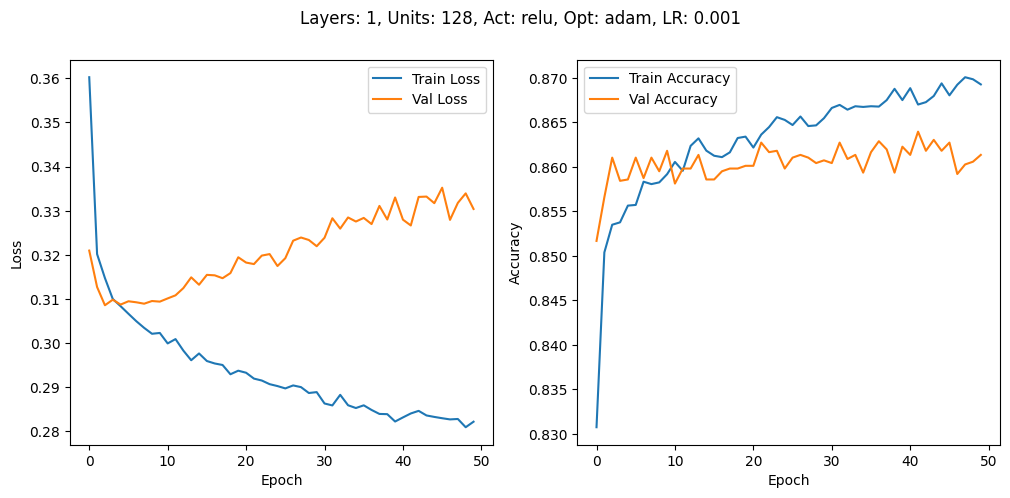

Epoch 10/50, Train Loss: 0.3016, Val Loss: 0.3109, Train Acc: 0.8581, Val Acc: 0.8600
Epoch 20/50, Train Loss: 0.2933, Val Loss: 0.3178, Train Acc: 0.8632, Val Acc: 0.8624
Epoch 30/50, Train Loss: 0.2884, Val Loss: 0.3253, Train Acc: 0.8647, Val Acc: 0.8606
Epoch 40/50, Train Loss: 0.2838, Val Loss: 0.3318, Train Acc: 0.8677, Val Acc: 0.8617
Epoch 50/50, Train Loss: 0.2817, Val Loss: 0.3368, Train Acc: 0.8684, Val Acc: 0.8612


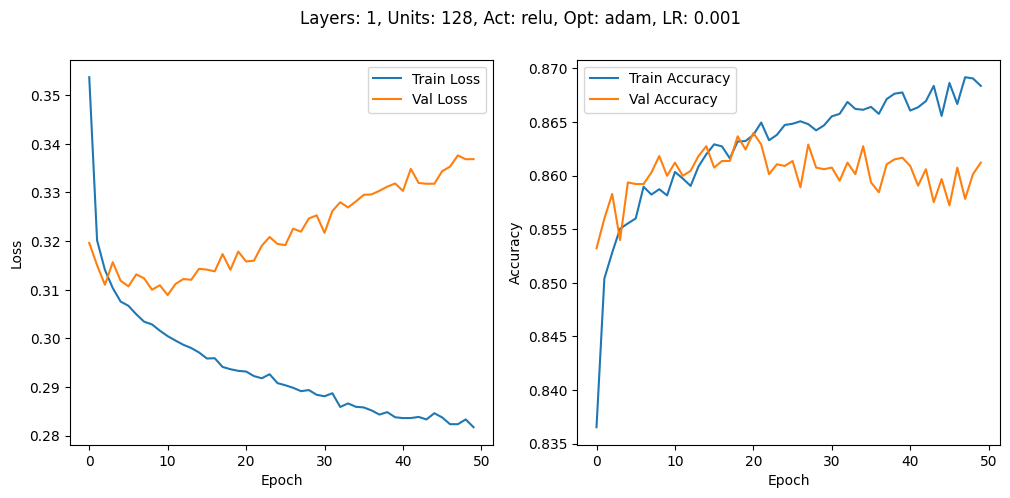

Epoch 10/50, Train Loss: 0.3007, Val Loss: 0.3103, Train Acc: 0.8592, Val Acc: 0.8607
Epoch 20/50, Train Loss: 0.2934, Val Loss: 0.3152, Train Acc: 0.8635, Val Acc: 0.8620
Epoch 30/50, Train Loss: 0.2893, Val Loss: 0.3197, Train Acc: 0.8652, Val Acc: 0.8606
Epoch 40/50, Train Loss: 0.2854, Val Loss: 0.3264, Train Acc: 0.8666, Val Acc: 0.8595
Epoch 50/50, Train Loss: 0.2818, Val Loss: 0.3372, Train Acc: 0.8685, Val Acc: 0.8567


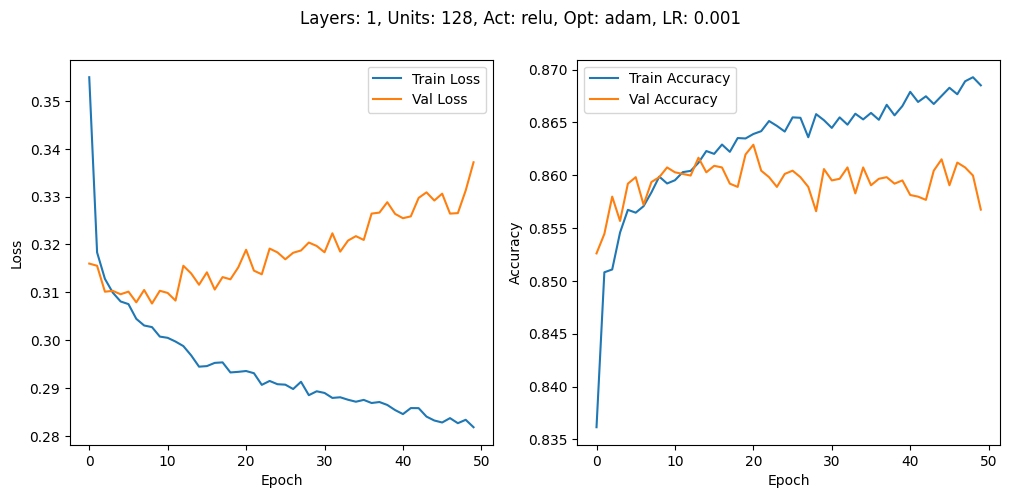

In [ ]:
# Run the training with different random initializations
for _ in range(3):
    torch.manual_seed(torch.seed())
    res = train_model(hidden_layers=1,
                      hidden_units=128,
                      activation='relu',
                      optimizer_type='adam',
                      learning_rate=0.001)
    results.append(res)

## Overall Results

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.sort_values('val_acc', ascending=False)

hidden_layers  hidden_units  activation optimizer  learning_rate  \
1               1            64        relu      adam         0.0010   
9               1           128        relu       sgd         0.0010   
16              1           128        relu      adam         0.0010   
17              1           128        relu      adam         0.0010   
0               1            32        relu      adam         0.0010   
7               1           128  leaky_relu      adam         0.0010   
13              1           128        relu      adam         0.0010   
4               2           128     sigmoid      adam         0.0010   
15              1           128        relu      adam         0.0010   
6               1           128     sigmoid      adam         0.0010   
12              1           128        relu      adam         0.0001   
5               1           128        relu      adam         0.0010   
11              1           128        relu      adam         0.0010   
3               2            64     sigmoid      adam         0.0010   
8               1           128        relu      adam         0.0010   
14              1           128        relu      adam         0.0010   
2               1           128        relu      adam         0.0010   
18              1           128        relu      adam         0.0010   
10              1           128        relu      adam         0.0100   

    train_loss  val_loss  train_acc   val_acc  
1     0.288239  0.340194   0.864711  0.862583  
9     0.304247  0.310262   0.857878  0.861968  
16    0.282186  0.330394   0.869280  0.861354  
17    0.281738  0.336846   0.868358  0.861201  
0     0.296382  0.322984   0.861602  0.861201  
7     0.281040  0.340263   0.869779  0.860740  
13    0.280033  0.341664   0.867207  0.860587  
4     0.293441  0.312223   0.861909  0.860126  
15    0.281813  0.342586   0.867706  0.860126  
6     0.297897  0.306381   0.861256  0.860126  
12    0.298301  0.310453   0.860680  0.859972  
5     0.282384  0.330721   0.867936  0.859819  
11    0.282817  0.342226   0.869318  0.859358  
3     0.300006  0.309679   0.858338  0.859051  
8     0.282410  0.341325   0.868973  0.858898  
14    0.281743  0.347051   0.869241  0.858283  
2     0.282052  0.348258   0.869664  0.857516  
18    0.281796  0.337183   0.868512  0.856748  
10    0.296928  1.292235   0.860450  0.853984

## **(ii) MLP Accuracy & Runtime**

In [ ]:
import time
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def tune_mlp_comprehensive(X_train, y_train, X_test, y_test):
    """
    Comprehensive MLP tuning varying all specified parameters
    Returns: best_model, test_accuracy, training_time
    """
    # Base model with early stopping
    mlp = MLPClassifier(early_stopping=True,
                       validation_fraction=0.1,
                       max_iter=500,
                       random_state=42)

    # Comprehensive parameter grid
    param_grid = {
        # Architecture
        'hidden_layer_sizes': [
            (64,),          # Single layer
            (128,),         # Single wider layer
            (64, 32),       # Two layers
            (128, 64),      # Two wider layers
            (256,),         # Very wide single layer
            (128, 128)      # Two equal layers
        ],

        # Activation functions
        'activation': ['relu', 'tanh', 'logistic'],

        # Optimizers and learning rates
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'momentum': [0.8, 0.9],  # For SGD

        # Regularization
        'alpha': [0.0001, 0.001, 0.01],
        'batch_size': [32, 64, 128],

        # Random initialization variations
        'random_state': [42, 123, 321]
    }

    # Use RandomizedSearchCV for computational purposes
    start_time = time.time()
    search = RandomizedSearchCV(mlp, param_grid, n_iter=50, cv=5,
                              n_jobs=-1, verbose=1, random_state=42)
    search.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Evaluate
    test_acc = accuracy_score(y_test, search.predict(X_test_scaled))

    # Print results
    print("\nTuning Results:")
    print(f"Best parameters: {search.best_params_}")
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Best CV score: {search.best_score_:.4f}")

    return search.best_estimator_, test_acc, training_time

# Run the comprehensive tuning
best_mlp, mlp_test_acc, mlp_train_time = tune_mlp_comprehensive(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Tuning Results:
Best parameters: {'solver': 'adam', 'random_state': 123, 'momentum': 0.8, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (64,), 'batch_size': 32, 'alpha': 0.0001, 'activation': 'logistic'}
Test accuracy: 0.8492
Training time: 1888.36 seconds
Best CV score: 0.8540


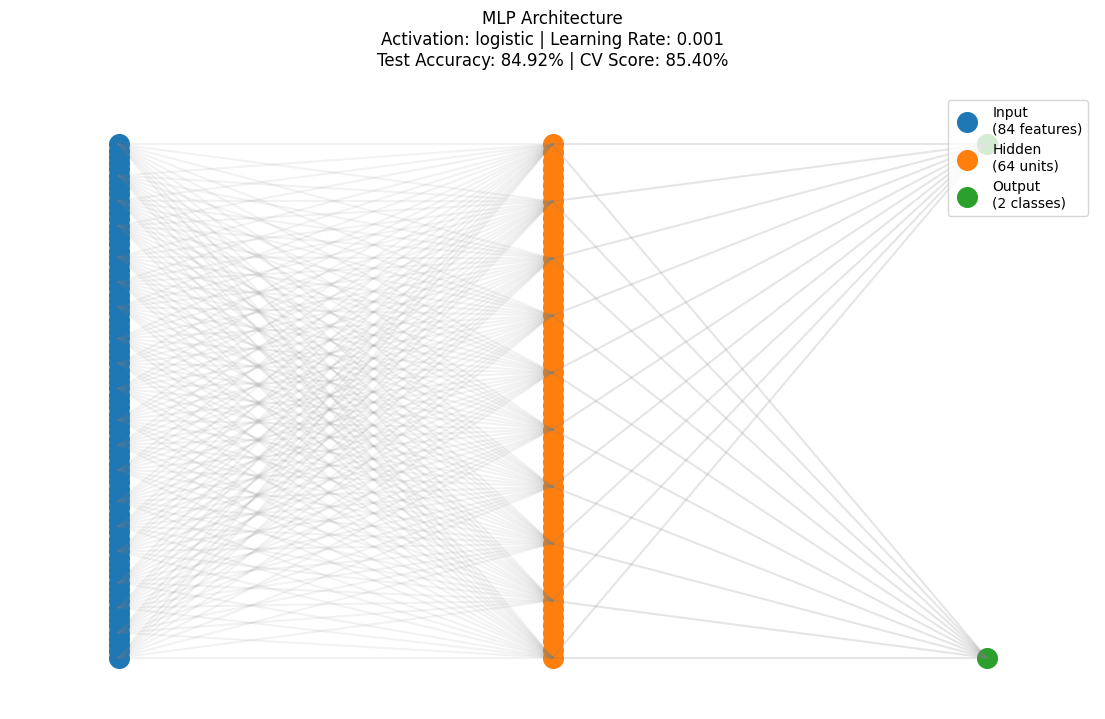

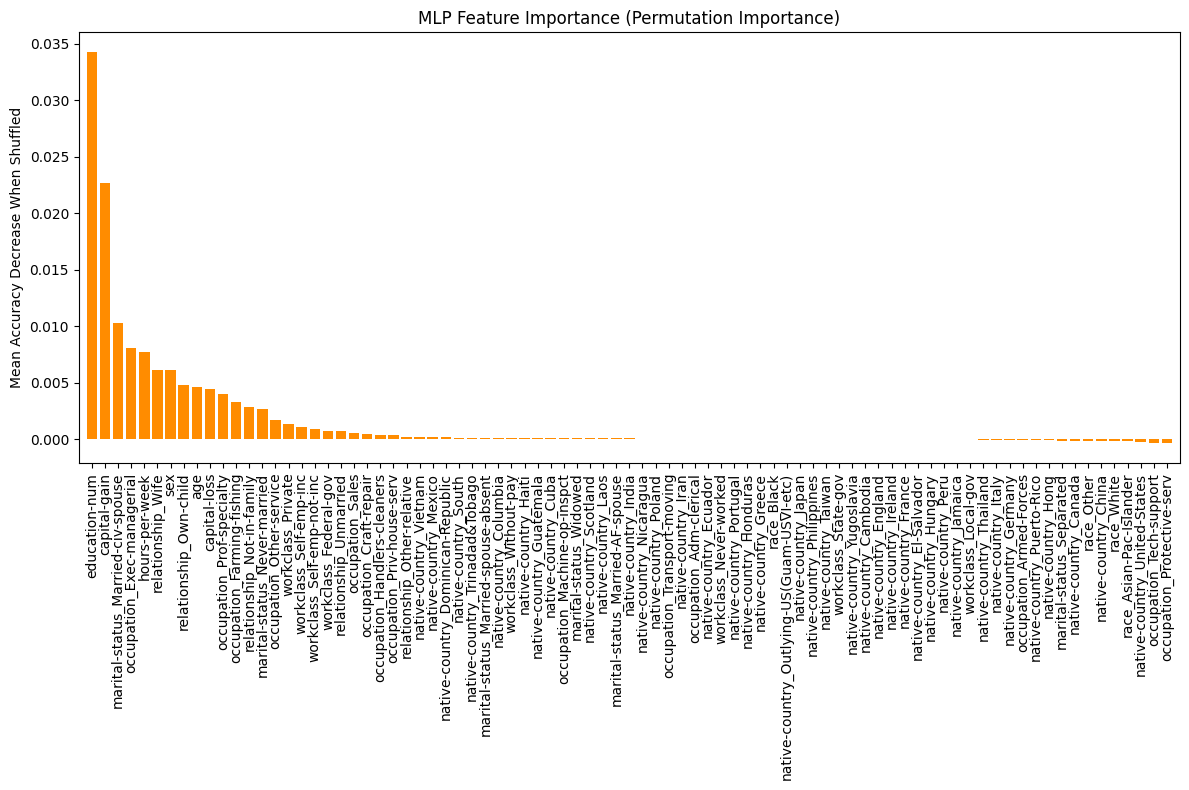

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from matplotlib.lines import Line2D

# Best parameters
params = {
    'solver': 'adam',
    'random_state': 123,
    'momentum': 0.8,
    'learning_rate_init': 0.001,
    'hidden_layer_sizes': (64,),
    'batch_size': 32,
    'alpha': 0.0001,
    'activation': 'logistic'
}

# MLP Architecture Diagram
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Network dimensions
input_size = X_train_scaled.shape[1]
hidden_size = params['hidden_layer_sizes'][0]
output_size = len(np.unique(y_train))

# Draw nodes
for i, (layer_size, layer_name) in enumerate(zip(
    [input_size, hidden_size, output_size],
    ['Input\n(84 features)', 'Hidden\n(64 units)', 'Output\n(2 classes)']
)):
    x = i * 2
    y_values = np.linspace(-1, 1, layer_size)
    ax.scatter([x] * layer_size, y_values, s=200, label=layer_name)

# Draw connections
for src in np.linspace(0, input_size-1, 20, dtype=int):
    for dst in np.linspace(0, hidden_size-1, 10, dtype=int):
        ax.plot([0, 2],
                [np.linspace(-1, 1, input_size)[src],
                np.linspace(-1, 1, hidden_size)[dst]],
                'gray', alpha=0.1)

for src in np.linspace(0, hidden_size-1, 10, dtype=int):
    for dst in range(output_size):
        ax.plot([2, 4],
                [np.linspace(-1, 1, hidden_size)[src],
                np.linspace(-1, 1, output_size)[dst]],
                'gray', alpha=0.2)

# Formatting
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-1.2, 1.2)
ax.set_title(
    f"MLP Architecture\n"
    f"Activation: {params['activation']} | "
    f"Learning Rate: {params['learning_rate_init']}\n"
    f"Test Accuracy: {0.8492:.2%} | "
    f"CV Score: {0.8540:.2%}",
    pad=20
)
ax.legend(loc='upper right')
ax.axis('off')
plt.show()

# Feature Importance Plot
result = permutation_importance(best_mlp, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[::-1]

# These are the columns that weren't dropped during preprocessing
original_features = [
    'age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week'
]

# Then get the one-hot encoded feature names
categorical_features = []
for col in train_df.columns:
    if col not in original_features and col != 'income' and col != 'education' and col != 'fnlwgt':
        if col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']:
            categorical_features.extend([f"{col}_{cat}" for cat in train_df[col].dropna().unique() if cat != ' ?'])
        else:
            original_features.append(col)

# Combine all feature names in the correct order
feature_names = np.array(original_features + categorical_features)

plt.figure(figsize=(12, 8))
plt.bar(range(len(feature_names)), result.importances_mean[sorted_idx],
        color='darkorange', align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_idx], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.title('MLP Feature Importance (Permutation Importance)')
plt.ylabel('Mean Accuracy Decrease When Shuffled')
plt.tight_layout()
plt.show()

# **Part 2: Machine Learning Pipeline**

## **(a) Data & Preprocessing**

In [ ]:
import kagglehub

#The dataset link: https://www.kaggle.com/datasets/gauthamvijayaraj/spotify-tracks-dataset-updated-every-week

# Download latest version
path = kagglehub.dataset_download("gauthamvijayaraj/spotify-tracks-dataset-updated-every-week")

print("Path to dataset files:", path)

import os

# Set your dataset directory
dataset_path = "/kaggle/input/spotify-tracks-dataset-updated-every-week"

# List files in the directory
os.listdir(dataset_path)

Path to dataset files: /kaggle/input/spotify-tracks-dataset-updated-every-week


['spotify_tracks.csv']

In [ ]:
import pandas as pd

csv_path = os.path.join(dataset_path, "spotify_tracks.csv")
spotify_df = pd.read_csv(csv_path)
spotify_df

track_id                                  track_name  \
0      2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1      4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2      59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3      5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4      1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   
...                       ...                                         ...   
62312  3eHDwMQYPEziy2DWRBNoLv                        Sani - G.O.A.T Remix   
62313  5hHtCqkNv5eo99OrEFFcgS                            Life of Bachelor   
62314  08foF9YHgKmIgOy3xMWRZy                                     Yo Baby   
62315  2wLFbVlQGKJSd9lwzwL47F                           Fast Fast Vadiley   
62316  5OYxwYeFfumMTAoAdVeet3             Moonu Moonu Moonu (From "3:33")   

                                             artist_name  year  popularity  \
0                                    Anirudh Ravichander  2024          59   
1      Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2               Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3      Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4      Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   
...                                                  ...   ...         ...   
62312  Arvind Raj, Sheezay, Music Kitchen, FSPROD Vin...  2021          30   
62313  A H Kaashif, Navakkarai Naveen Prabanjam, Asal...  2021          30   
62314         Rakesh Ambigapathy, Asal Kolaar, MC Vickey  2021          18   
62315          Asal Kolaar, Priyadarshan Balasubramanian  2021           1   
62316  Harshavardhan Rameshwar, G. V. Prakash, Dharma...  2021           1   

                                             artwork_url  \
0      https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1      https://i.scdn.co/image/ab67616d0000b273be1b03...   
2      https://i.scdn.co/image/ab67616d0000b27334a1dd...   
3      https://i.scdn.co/image/ab67616d0000b27332e623...   
4      https://i.scdn.co/image/ab67616d0000b2735a59b6...   
...                                                  ...   
62312  https://i.scdn.co/image/ab67616d0000b273819d23...   
62313  https://i.scdn.co/image/ab67616d0000b2736cd651...   
62314  https://i.scdn.co/image/ab67616d0000b27300da25...   
62315  https://i.scdn.co/image/ab67616d0000b273e051e1...   
62316  https://i.scdn.co/image/ab67616d0000b273efd671...   

                                          album_name  acousticness  \
0                         Leo Das Entry (From "Leo")       0.02410   
1                                       AAO KILLELLE       0.08510   
2             Mayakiriye Sirikiriye (Orchestral EDM)       0.03110   
3           Scene Ah Scene Ah (Experimental EDM Mix)       0.22700   
4         Gundellonaa X I Am a Disco Dancer (Mashup)       0.01530   
...                                              ...           ...   
62312                           Sani (G.O.A.T Remix)       0.08490   
62313  Bachelor (Original Motion Picture Soundtrack)       0.07880   
62314                                        Yo Baby       0.00918   
62315                                Arjuna Phalguna       0.10100   
62316                Moonu Moonu Moonu (From "3:33")       0.18600   

       danceability  duration_ms  ...   key  liveness  loudness  mode  \
0             0.753      97297.0  ...   8.0    0.1000    -5.994   0.0   
1             0.780     207369.0  ...  10.0    0.0951    -5.674   0.0   
2             0.457      82551.0  ...   2.0    0.0831    -8.937   0.0   
3             0.718     115831.0  ...   7.0    0.1240   -11.104   1.0   
4             0.689     129621.0  ...   7.0    0.3450    -9.637   1.0   
...             ...          ...  ...   ...       ...       ...   ...   
62312         0.877     359718.0  ...   7.0    0.1100   -11.458   1.0   
62313        

In [ ]:
import pandas as pd

# Drop unnecessary columns
cols_to_drop = ['track_id', 'track_name', 'album_name', 'artist_name',
                'artwork_url', 'track_url', 'language', 'popularity', 'year']
spotify_df = spotify_df.drop(columns=cols_to_drop, errors='ignore')

# Drop rows with missing values
spotify_df = spotify_df.dropna()

# Filter out impossible loudness values (-60dB to 0dB is valid range)
spotify_df = spotify_df[(spotify_df['loudness'] >= -60) & (spotify_df['loudness'] <= 0)]

# Encode categorical features (only 'mode' exists in this dataset)
if 'mode' in spotify_df.columns:
    spotify_df['mode'] = spotify_df['mode'].astype('category').cat.codes

# Select numeric features without scaling for now
numeric_cols = spotify_df.select_dtypes(include=['float64', 'int64']).columns
X = spotify_df[numeric_cols].copy()
X

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.02410         0.753      97297.0   0.970          0.055300   
1           0.08510         0.780     207369.0   0.793          0.000000   
2           0.03110         0.457      82551.0   0.491          0.000000   
3           0.22700         0.718     115831.0   0.630          0.000727   
4           0.01530         0.689     129621.0   0.748          0.000001   
...             ...           ...          ...     ...               ...   
62312       0.08490         0.877     359718.0   0.469          0.000000   
62313       0.07880         0.833     154364.0   0.689          0.000000   
62314       0.00918         0.842     234000.0   0.765          0.000000   
62315       0.10100         0.682     180807.0   0.861          0.000000   
62316       0.18600         0.817     202667.0   0.903          0.000083   

        key  liveness  loudness  speechiness    tempo  time_signature  valence  
0       8.0    0.1000    -5.994       0.1030  110.997             4.0    0.459  
1      10.0    0.0951    -5.674       0.0952  164.995             3.0    0.821  
2       2.0    0.0831    -8.937       0.1530  169.996             4.0    0.598  
3       7.0    0.1240   -11.104       0.4450  169.996             4.0    0.362  
4       7.0    0.3450    -9.637       0.1580  128.961             4.0    0.593  
...     ...       ...       ...          ...      ...             ...      ...  
62312   7.0    0.1100   -11.458       0.3530  100.024             4.0    0.504  
62313   8.0    0.2670    -5.061       0.0813  110.041             4.0    0.524  
62314   7.0    0.0790    -5.855       0.1370  122.038             4.0    0.669  
62315   1.0    0.3200    -6.061       0.2850   74.993             4.0    0.439  
62316   6.0    0.3780    -7.353       0.1170   89.975             4.0    0.837  

[62270 rows x 12 columns]

## **(b) Exploratory Data Analysis & Visualization**

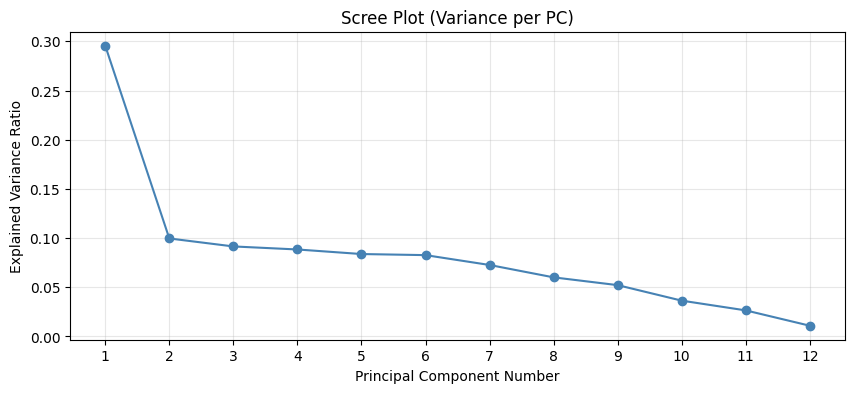

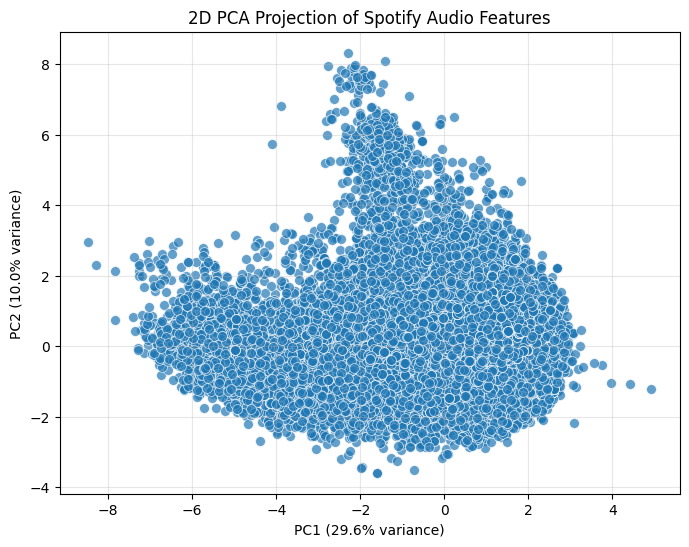

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(10, 4))
components = range(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(components, pca.explained_variance_ratio_,
         marker='o',
         linestyle='-',
         color='steelblue')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Variance per PC)')
plt.xticks(components)
plt.grid(alpha=0.3)
plt.show()

# PCA plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.7, s=50)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.title("2D PCA Projection of Spotify Audio Features")
plt.grid(alpha=0.3)
plt.show()

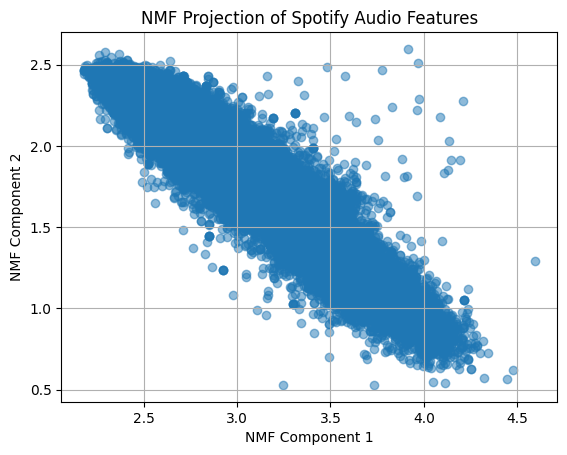

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform NMF
nmf = NMF(n_components=2, init='random', random_state=42)
 # Ensure non-negative
X_nmf = nmf.fit_transform(X_scaled - X_scaled.min() + 1e-6)
plt.scatter(X_nmf[:, 0], X_nmf[:, 1], alpha=0.5)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.title("NMF Projection of Spotify Audio Features")
plt.grid()

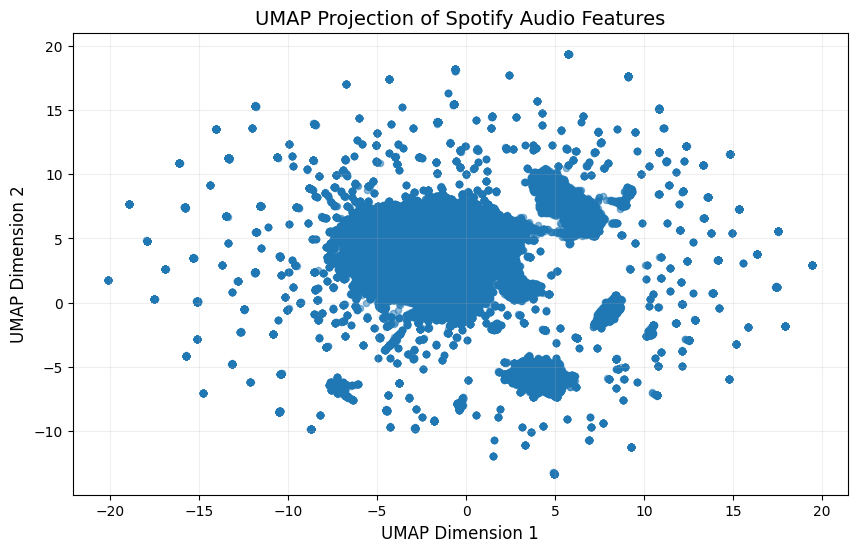

In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Plot with Axis Labels
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5, s=20)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.title("UMAP Projection of Spotify Audio Features", fontsize=14)
plt.grid(alpha=0.2)
plt.show()

## **(c) Modeling & Model Validation**

## GMM (Full Covariance) with PCA

k=12: 100%|██████████| 30/30 [11:12<00:00, 22.43s/it]


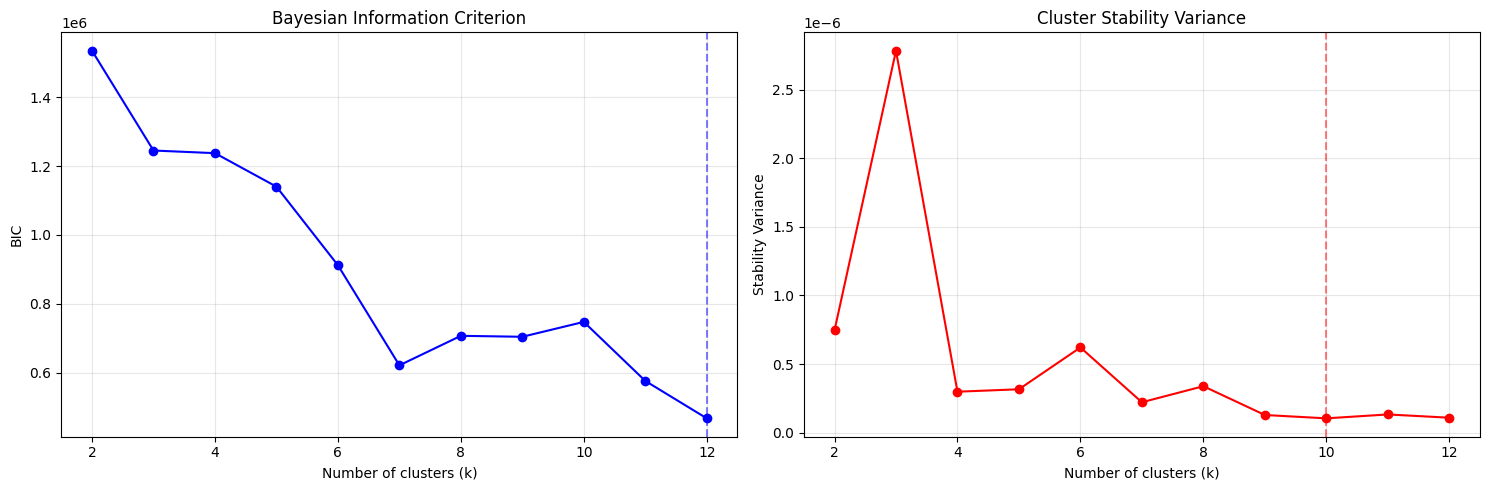

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Data Preparation
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# BIC Calculation
n_components_range = range(2, 13)
bic = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))
optimal_n_bic = n_components_range[np.argmin(bic)]

# Stability Variance Analysis
def compute_stability_variance(X_pca, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []

    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            # Subsample with different random states
            idx1 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)
            idx2 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)

            # Fit GMMs on PCA components
            gmm1 = GaussianMixture(n_components=k, covariance_type='full')
            gmm2 = GaussianMixture(n_components=k, covariance_type='full')
            labels1 = gmm1.fit_predict(X_pca[idx1])
            labels2 = gmm2.fit_predict(X_pca[idx2])

            # Compare on intersecting points
            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))

        stability_variances.append(np.var(aris))
    return stability_variances

stability_variances = compute_stability_variance(X_pca, n_components_range)
optimal_k_stability = n_components_range[np.argmin(stability_variances)]

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# BIC Plot
ax1.plot(n_components_range, bic, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('BIC')
ax1.set_title('Bayesian Information Criterion')
ax1.axvline(x=optimal_n_bic, color='blue', linestyle='--', alpha=0.5)
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(n_components_range, stability_variances, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance')
ax2.set_title('Cluster Stability Variance')
ax2.axvline(x=optimal_k_stability, color='red', linestyle='--', alpha=0.5)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

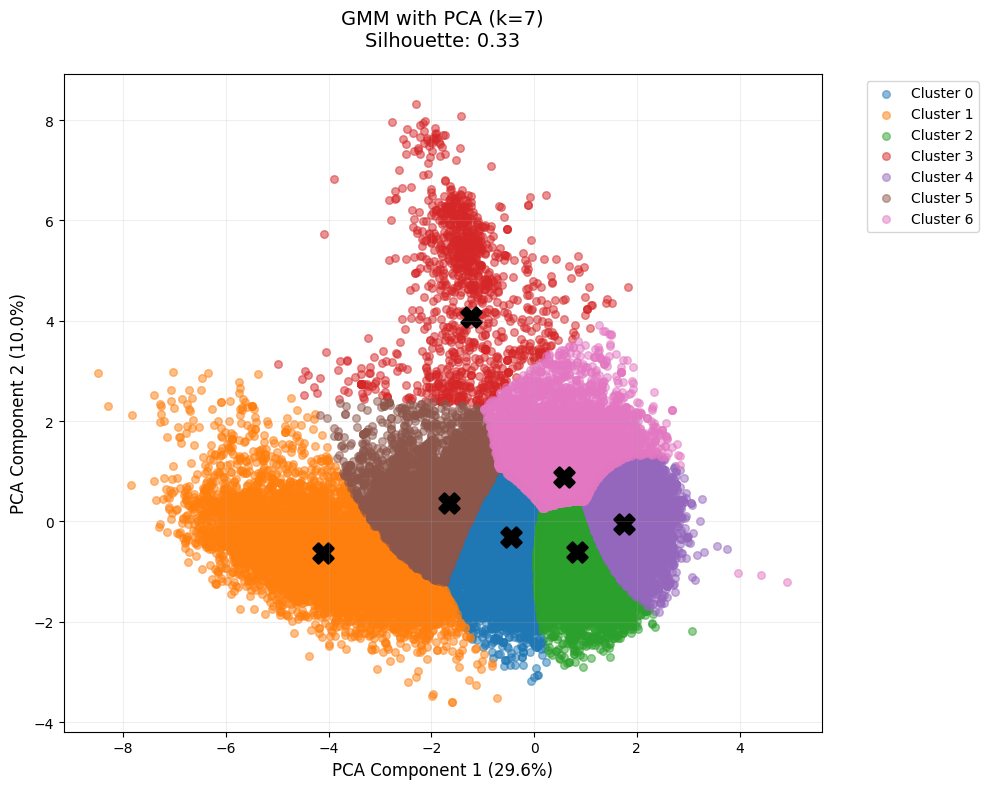


Cluster Characteristics (k=7):



Cluster Sizes (Total: 62270 tracks):
cluster
0    10203
1     6399
2    14131
3     1102
4    16239
5     6013
6     8183
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Fit GMM with k=7
gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=42)
clusters = gmm.fit_predict(X_pca)

# Calculate metrics
sil_score = silhouette_score(X_pca, clusters)

# Visualization
plt.figure(figsize=(10, 8))
for i in range(7):
    cluster_points = X_pca[clusters == i]
    center = gmm.means_[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i}', alpha=0.5, s=30)
    plt.scatter(center[0], center[1], marker='X', s=200, c='black', linewidths=2)

plt.xlabel(f"PCA Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"PCA Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=12)
plt.title(f"GMM with PCA (k=7)\nSilhouette: {sil_score:.2f}",
          fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['cluster'] = clusters
cluster_means = spotify_df.groupby('cluster').mean().round(2)

print("\nCluster Characteristics (k=7):")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['cluster'].value_counts().sort_index())

## GMM (Full Covariance) with UMAP

k=12: 100%|██████████| 30/30 [03:33<00:00,  7.11s/it]


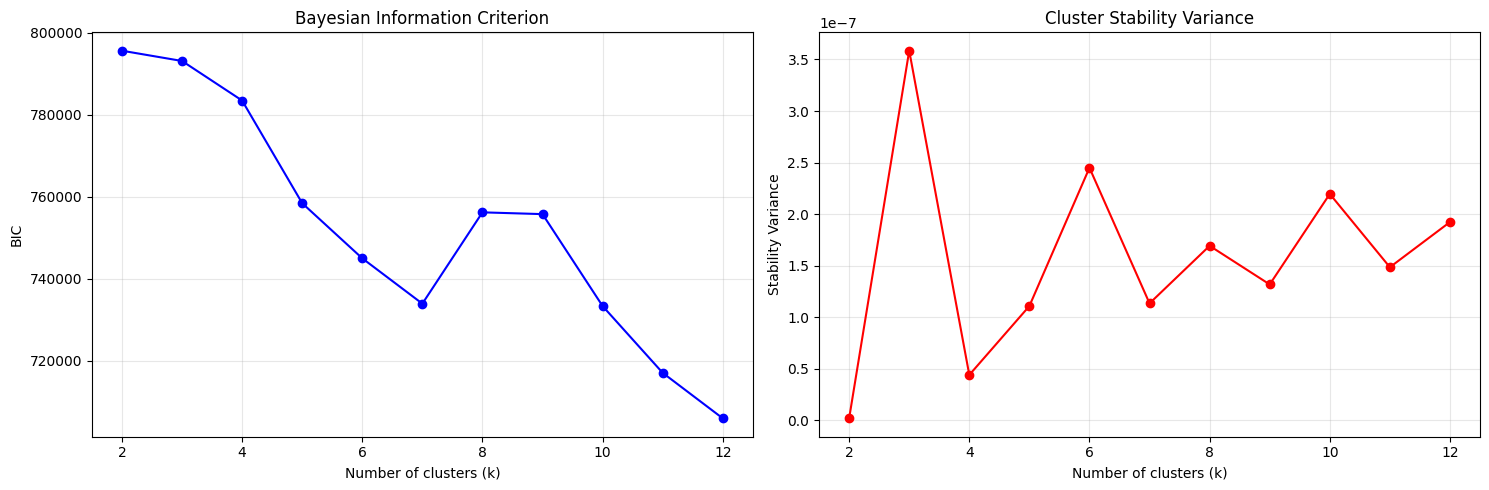

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Data Preparation
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# BIC Calculation
n_components_range = range(2, 13)
bic = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_umap)
    bic.append(gmm.bic(X_umap))

# Stability Variance Analysis
def compute_stability_variance(X_umap, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []

    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            idx1 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)
            idx2 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)

            gmm1 = GaussianMixture(n_components=k, covariance_type='full')
            gmm2 = GaussianMixture(n_components=k, covariance_type='full')
            labels1 = gmm1.fit_predict(X_umap[idx1])
            labels2 = gmm2.fit_predict(X_umap[idx2])

            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))

        stability_variances.append(np.var(aris))

    return stability_variances

stability_variances = compute_stability_variance(X_umap, n_components_range)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# BIC Plot
ax1.plot(n_components_range, bic, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('BIC')
ax1.set_title('Bayesian Information Criterion')
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(n_components_range, stability_variances, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance')
ax2.set_title('Cluster Stability Variance')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

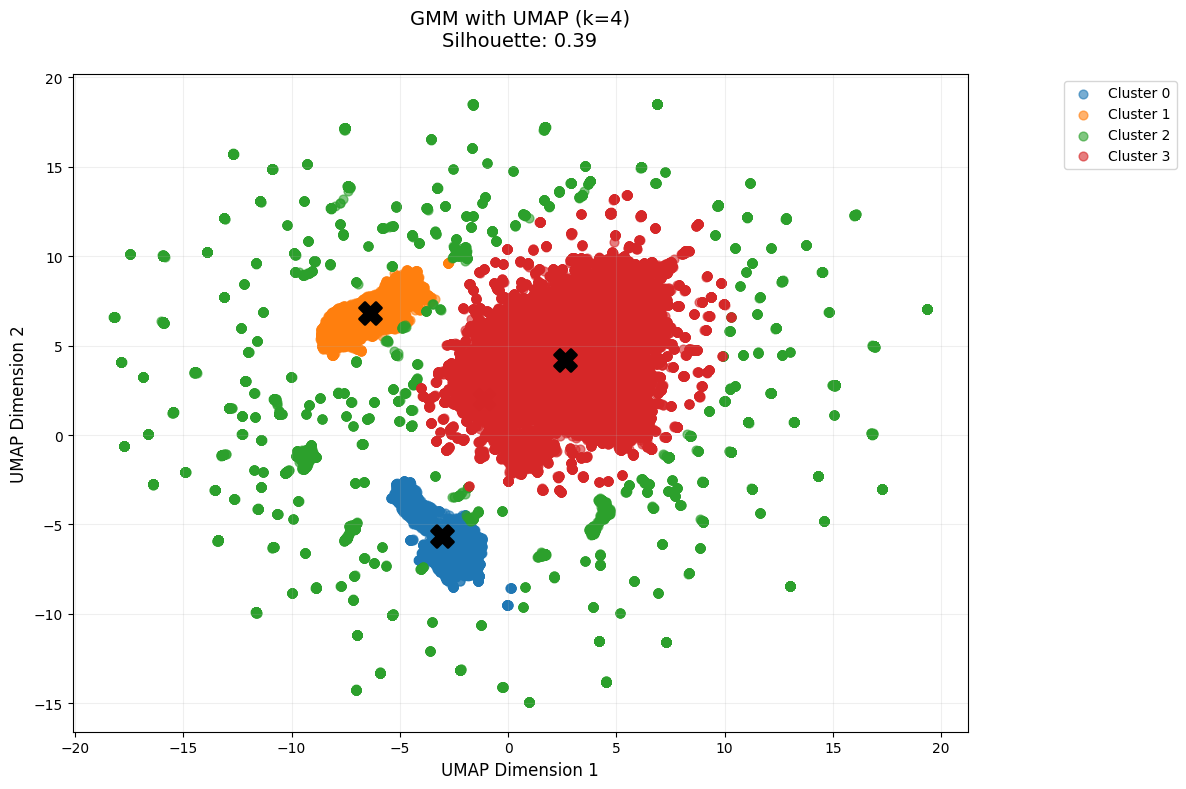


Cluster Characteristics:



Cluster Sizes (Total: 62270 tracks):
cluster
0     6295
1     8095
2     8591
3    39289
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Fit GMM with k=4
k = 4
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
clusters = gmm.fit_predict(X_umap)

# Calculate Silhouette Score
sil_score = silhouette_score(X_umap, clusters)

# Visualization
plt.figure(figsize=(12, 8))
for i in range(k):
    cluster_points = X_umap[clusters == i]
    center = gmm.means_[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i}', alpha=0.6, s=40)
    plt.scatter(center[0], center[1], marker='X', s=250, c='black', linewidths=2)

plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.title(f"GMM with UMAP (k={k})\nSilhouette: {sil_score:.2f}",
          fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['cluster'] = clusters
cluster_means = spotify_df.groupby('cluster').mean().round(2)

print("\nCluster Characteristics:")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['cluster'].value_counts().sort_index())

## GMM (Tied Covariance) with PCA

k=12: 100%|██████████| 30/30 [03:23<00:00,  6.79s/it]


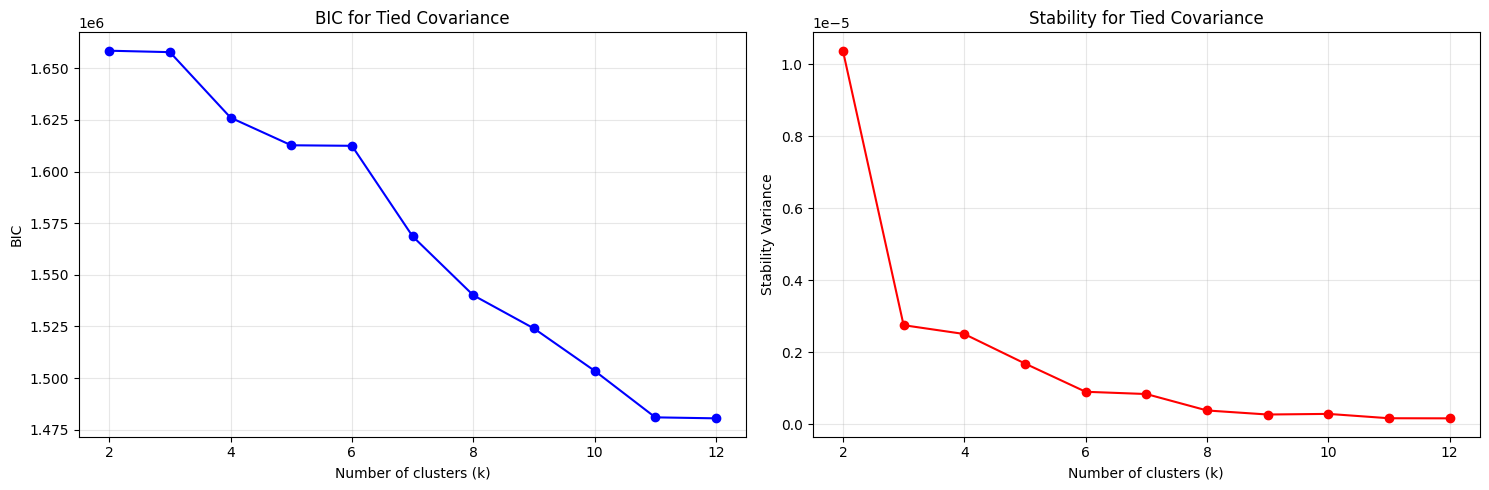

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Data Preparation
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# BIC Calculation
n_components_range = range(2, 13)
bic_tied = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='tied', random_state=42)
    gmm.fit(X_pca)
    bic_tied.append(gmm.bic(X_pca))
optimal_n_bic_tied = n_components_range[np.argmin(bic_tied)]

# Stability Variance Analysis
def compute_stability_variance(X_pca, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []
    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            idx1 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)
            idx2 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)

            # Changed to tied covariance
            gmm1 = GaussianMixture(n_components=k, covariance_type='tied')
            gmm2 = GaussianMixture(n_components=k, covariance_type='tied')
            labels1 = gmm1.fit_predict(X_pca[idx1])
            labels2 = gmm2.fit_predict(X_pca[idx2])

            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))
        stability_variances.append(np.var(aris))
    return stability_variances

stability_variances_tied = compute_stability_variance(X_pca, n_components_range)
optimal_k_stability_tied = n_components_range[np.argmin(stability_variances_tied)]

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# BIC Plot
ax1.plot(n_components_range, bic_tied, 'bo-', label='Tied Covariance')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('BIC')
ax1.set_title('BIC for Tied Covariance')
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(n_components_range, stability_variances_tied, 'ro-', label='Tied Covariance')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance')
ax2.set_title('Stability for Tied Covariance')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

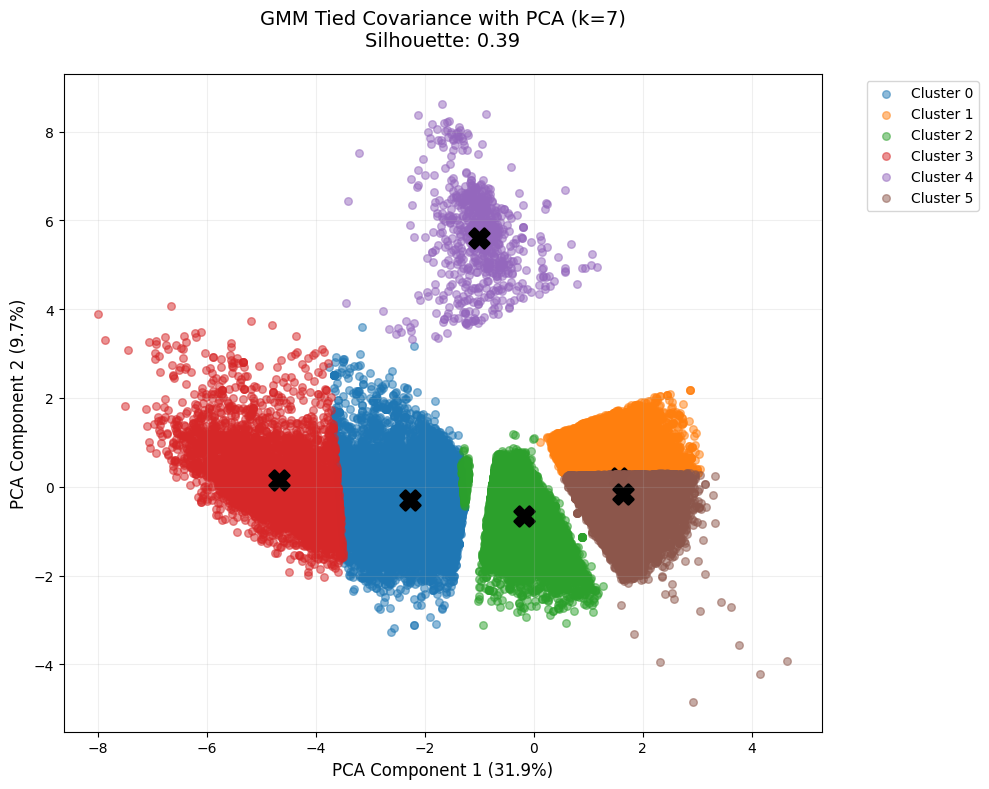


Cluster Characteristics (k=7):



Cluster Sizes (Total: 62270 tracks):
cluster
0    10987
1     9187
2    12985
3     4687
4      694
5    20000
6     3730
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection (2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Fit GMM with k=7 and tied covariance
gmm = GaussianMixture(
    n_components=7,
    covariance_type='tied',
    random_state=42
)
clusters = gmm.fit_predict(X_pca)

# Calculate metrics
sil_score = silhouette_score(X_pca, clusters)

# Visualization
plt.figure(figsize=(10, 8))
for i in range(6):
    cluster_points = X_pca[clusters == i]
    center = gmm.means_[i]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {i}',
        alpha=0.5,
        s=30
    )
    plt.scatter(
        center[0], center[1],
        marker='X', s=200,
        c='black',
        linewidths=2
    )

plt.xlabel(f"PCA Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"PCA Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=12)
plt.title(
    f"GMM Tied Covariance with PCA (k=7)\nSilhouette: {sil_score:.2f}",
    fontsize=14,
    pad=20
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['cluster'] = clusters
cluster_means = spotify_df.groupby('cluster').mean().round(2)

print("\nCluster Characteristics (k=7):")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['cluster'].value_counts().sort_index())

## GMM (Tied Covariance) with UMAP

k=12: 100%|██████████| 30/30 [01:35<00:00,  3.19s/it]


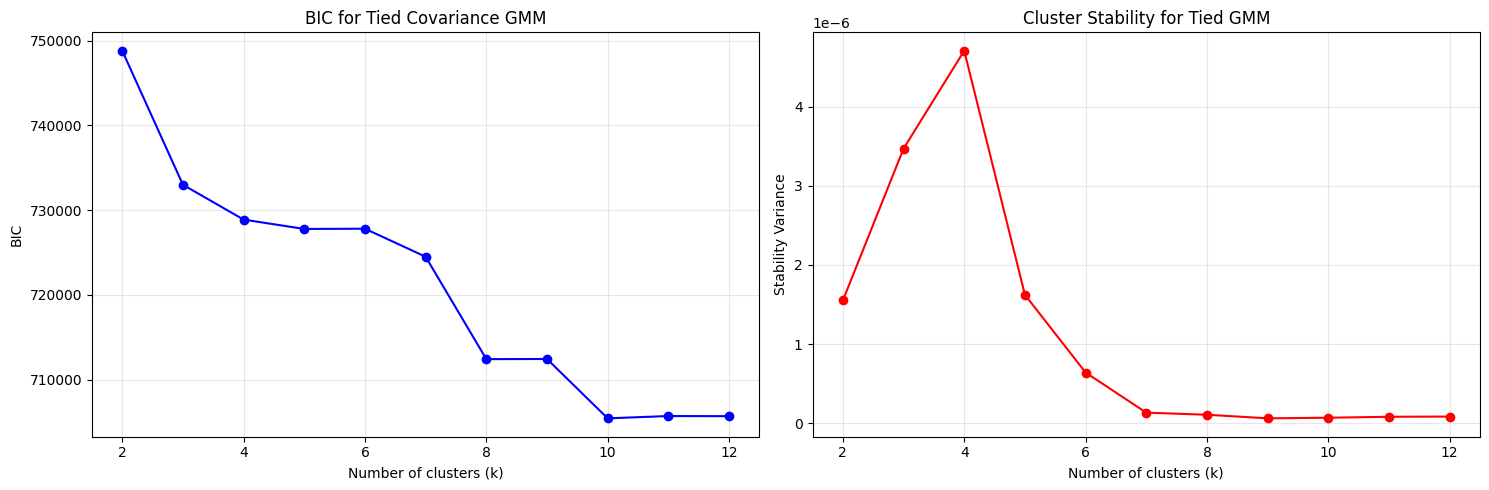

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Data Preparation
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection (2D)
umap = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap.fit_transform(X_scaled)

# BIC Calculation with tied covariance
n_components_range = range(2, 13)
bic_tied = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='tied', random_state=42)
    gmm.fit(X_umap)
    bic_tied.append(gmm.bic(X_umap))
optimal_n_bic = n_components_range[np.argmin(bic_tied)]

# Stability Analysis with tied covariance
def compute_stability_variance(X_umap, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []
    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            idx1 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)
            idx2 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)

            # Both GMMs use tied covariance
            gmm1 = GaussianMixture(n_components=k, covariance_type='tied')
            gmm2 = GaussianMixture(n_components=k, covariance_type='tied')
            labels1 = gmm1.fit_predict(X_umap[idx1])
            labels2 = gmm2.fit_predict(X_umap[idx2])

            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))
        stability_variances.append(np.var(aris))
    return stability_variances

stability_variances_tied = compute_stability_variance(X_umap, n_components_range)
optimal_k_stability = n_components_range[np.argmin(stability_variances_tied)]

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# BIC Plot
ax1.plot(n_components_range, bic_tied, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('BIC')
ax1.set_title('BIC for Tied Covariance GMM')
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(n_components_range, stability_variances_tied, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance')
ax2.set_title('Cluster Stability for Tied GMM')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

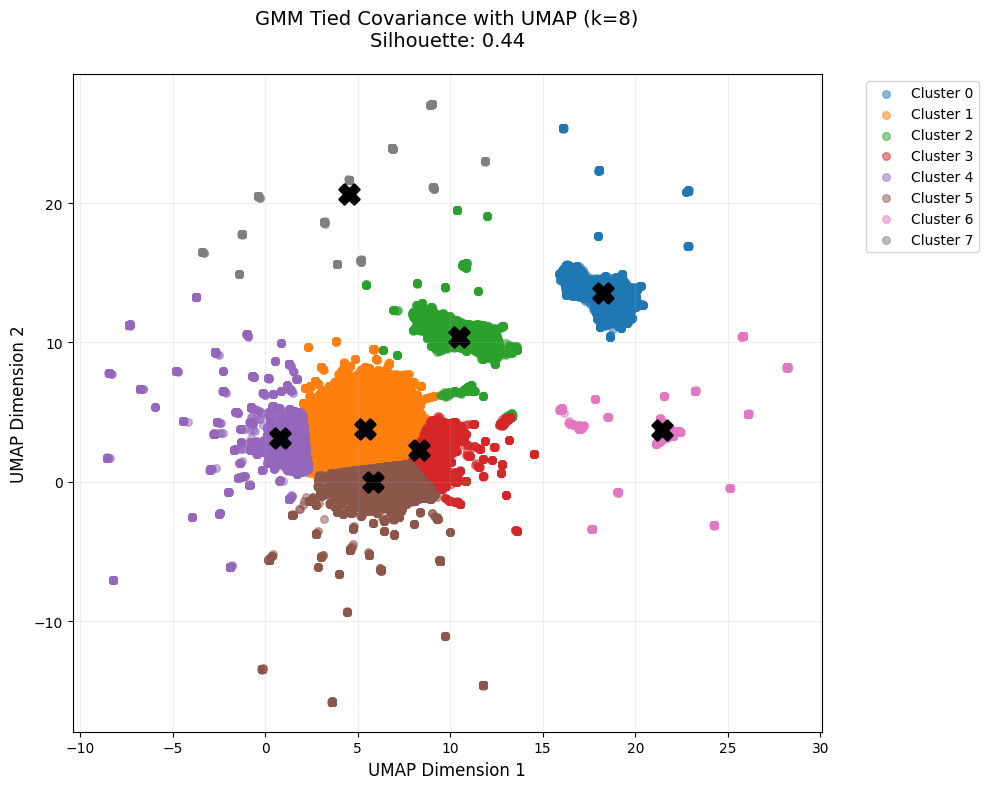


Cluster Characteristics (k=8):



Cluster Sizes (Total: 62270 tracks):
cluster
0     6951
1    20001
2     9310
3     5637
4     6995
5    10731
6     1854
7      791
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection (2D)
umap = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap.fit_transform(X_scaled)

# Fit GMM with k=8 and tied covariance
gmm = GaussianMixture(
    n_components=8,
    covariance_type='tied',
    random_state=42
)
clusters = gmm.fit_predict(X_umap)

# Calculate metrics
sil_score = silhouette_score(X_umap, clusters)

# Visualization
plt.figure(figsize=(10, 8))
for i in range(8):
    cluster_points = X_umap[clusters == i]
    center = gmm.means_[i]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {i}',
        alpha=0.5,
        s=30
    )
    plt.scatter(
        center[0], center[1],
        marker='X', s=200,
        c='black',
        linewidths=2
    )

plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.title(
    f"GMM Tied Covariance with UMAP (k=8)\nSilhouette: {sil_score:.2f}",
    fontsize=14,
    pad=20
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['cluster'] = clusters
cluster_means = spotify_df.groupby('cluster').mean().round(2)

print("\nCluster Characteristics (k=8):")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['cluster'].value_counts().sort_index())

## K-means with PCA

k=12: 100%|██████████| 30/30 [00:28<00:00,  1.05it/s]


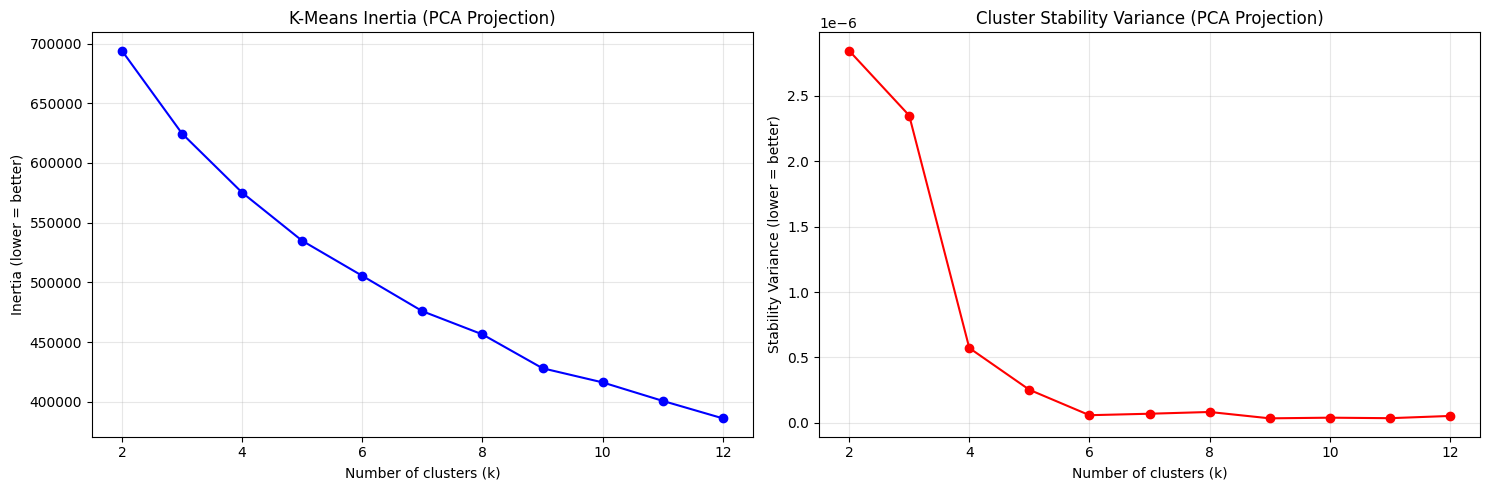

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Inertia criterion for K-Means to evalute
inertias = []
k_range = range(2, 13)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Stability Variance Analysis
def compute_stability_variance(X_pca, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []

    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            idx1 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)
            idx2 = resample(np.arange(len(X_pca)),
                          n_samples=int(subsample_ratio*len(X_pca)),
                          replace=False)

            kmeans1 = KMeans(n_clusters=k, n_init='auto')
            kmeans2 = KMeans(n_clusters=k, n_init='auto')
            labels1 = kmeans1.fit_predict(X_pca[idx1])
            labels2 = kmeans2.fit_predict(X_pca[idx2])

            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))

        stability_variances.append(np.var(aris))
    return stability_variances

stability_variances = compute_stability_variance(X_pca, k_range)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Plot
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia (lower = better)')
ax1.set_title('K-Means Inertia (PCA Projection)')
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(k_range, stability_variances, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance (lower = better)')
ax2.set_title('Cluster Stability Variance (PCA Projection)')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

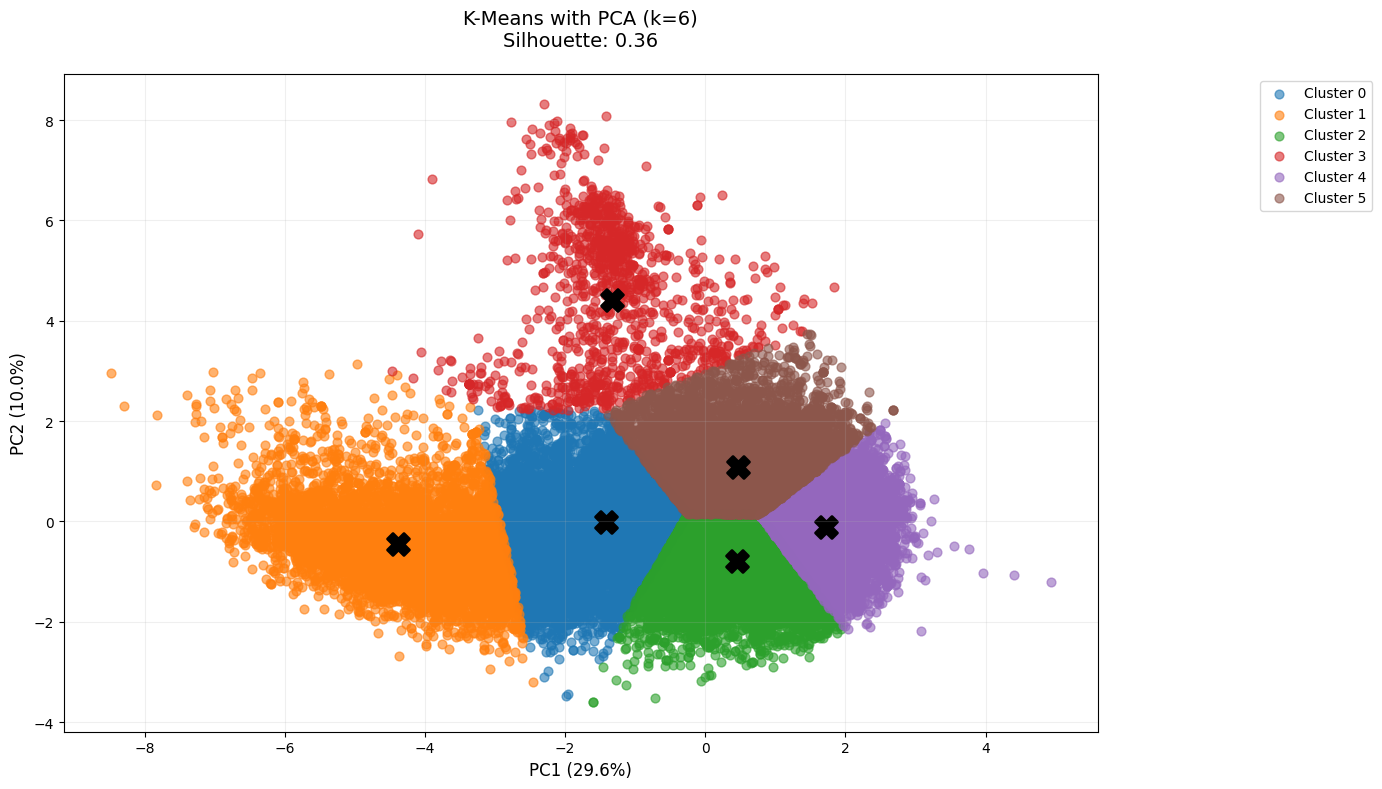


Cluster Characteristics:



Cluster Sizes (Total: 62270 tracks):
pca_cluster
0    11163
1     5873
2    15121
3     1142
4    18244
5    10727
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

# Calculate Metrics
sil_score = silhouette_score(X_pca, clusters)

# Visualization
plt.figure(figsize=(14, 8))
for i in range(k):
    cluster_points = X_pca[clusters == i]
    center = kmeans.cluster_centers_[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i}', alpha=0.6, s=40)
    plt.scatter(center[0], center[1], marker='X', s=250, c='black', linewidths=2)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=12)
plt.title(f"K-Means with PCA (k={k})\nSilhouette: {sil_score:.2f}", fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['pca_cluster'] = clusters
cluster_means = spotify_df.groupby('pca_cluster').mean().round(2)

print("\nCluster Characteristics:")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['pca_cluster'].value_counts().sort_index())

## K-means with UMAP

k=12: 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]


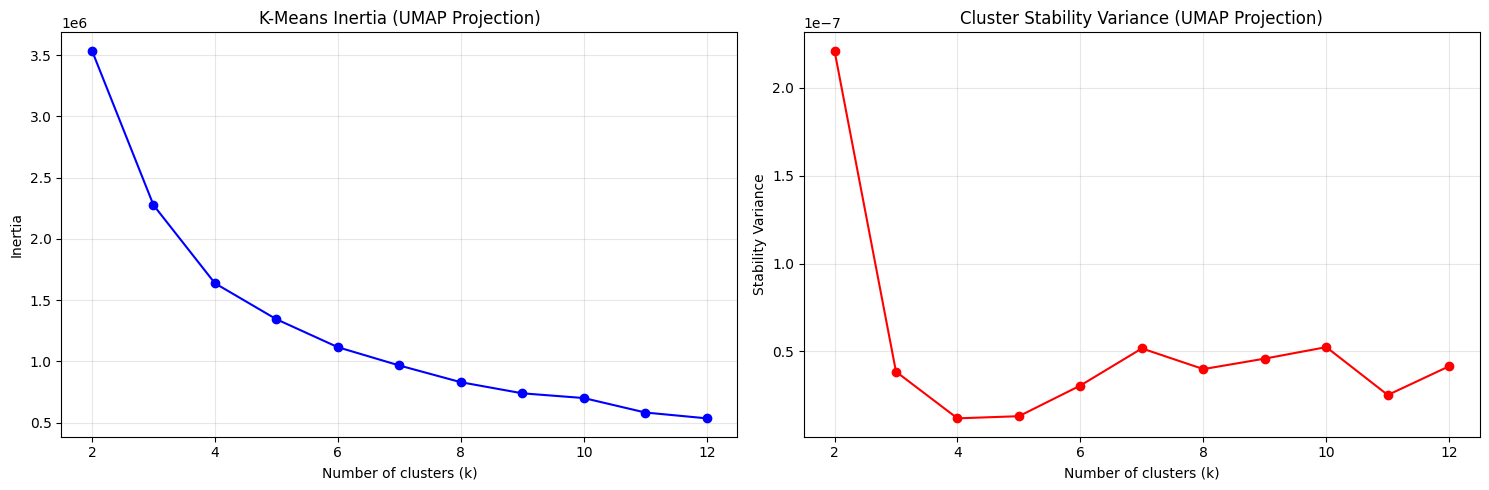

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.utils import resample
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Inertia Calculation
inertias = []
k_range = range(2, 13)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_umap)
    inertias.append(kmeans.inertia_)

# Stability Variance Analysis
def compute_stability_variance(X_umap, k_range, n_iter=30, subsample_ratio=0.8):
    stability_variances = []

    for k in k_range:
        aris = []
        for _ in tqdm(range(n_iter), desc=f"k={k}"):
            idx1 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)
            idx2 = resample(np.arange(len(X_umap)),
                          n_samples=int(subsample_ratio*len(X_umap)),
                          replace=False)

            kmeans1 = KMeans(n_clusters=k, n_init='auto')
            kmeans2 = KMeans(n_clusters=k, n_init='auto')
            labels1 = kmeans1.fit_predict(X_umap[idx1])
            labels2 = kmeans2.fit_predict(X_umap[idx2])

            common_idx = np.intersect1d(idx1, idx2)
            if len(common_idx) > 10:
                aris.append(adjusted_rand_score(
                    labels1[np.isin(idx1, common_idx)],
                    labels2[np.isin(idx2, common_idx)]
                ))

        stability_variances.append(np.var(aris))
    return stability_variances

stability_variances = compute_stability_variance(X_umap, k_range)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Plot
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('K-Means Inertia (UMAP Projection)')
ax1.grid(alpha=0.3)

# Stability Variance Plot
ax2.plot(k_range, stability_variances, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Stability Variance')
ax2.set_title('Cluster Stability Variance (UMAP Projection)')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

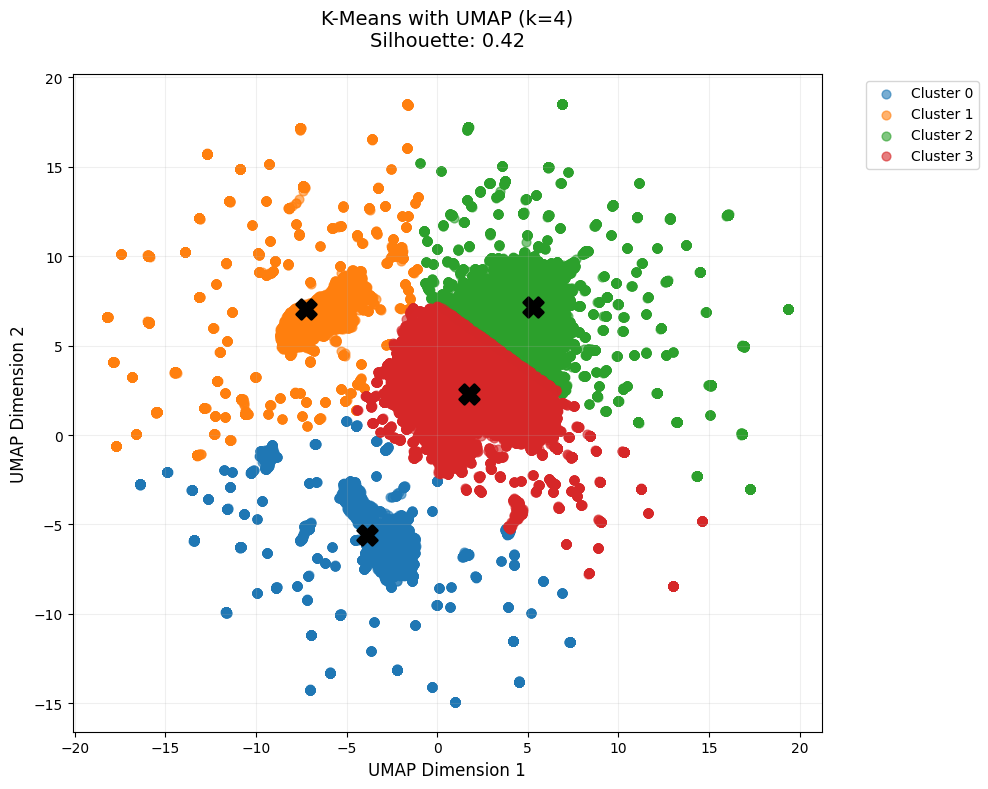


Cluster Characteristics:



Cluster Sizes (Total: 62270 tracks):
cluster
0     9404
1    10893
2    15780
3    26193
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap import UMAP
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
X = spotify_df.select_dtypes(include=['float64', 'int64']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP Projection
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Fit K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_umap)

# Calculate Metrics
sil_score = silhouette_score(X_umap, clusters)

# Visualization
plt.figure(figsize=(10, 8))
for i in range(k):
    cluster_points = X_umap[clusters == i]
    center = kmeans.cluster_centers_[i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {i}', alpha=0.6, s=40)
    plt.scatter(center[0], center[1], marker='X', s=200, c='black', linewidths=2)

plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.title(f"K-Means with UMAP (k={k})\nSilhouette: {sil_score:.2f}",
          fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Cluster Interpretation
spotify_df['cluster'] = clusters
cluster_means = spotify_df.groupby('cluster').mean().round(2)

print("\nCluster Characteristics:")
display(cluster_means.style.background_gradient(cmap='Blues', axis=0))

print(f"\nCluster Sizes (Total: {len(spotify_df)} tracks):")
print(spotify_df['cluster'].value_counts().sort_index())